# Đồ án cuối kì môn lập trình khoa học dữ liệu

# A. Thu thập dữ liệu
### I. Giới thiệu chủ đề và thông tin tập dữ liệu
1. Chủ đề
Tên chủ đề: Điểm thi THPT 


2. Lý do lựa chọn chủ đề và tập dữ liệu

Sau đợt dịch covid vừa qua, trải qua quá trình học online tại nhà và cơ cấu thi THPT quốc gia đã có nhiều thay đổi, đồng thời các trường Đại học cũng đã có những điều chỉnh về phương pháp tuyển sinh dẫn đến việc thi THPT và chọn khối thi của học sinh đã thay đổi nhiều. Nên nhóm em quyết định chọn dataframe này để quan sát và đánh giá ảnh hưởng của những vấn đề kể trên đến điểm thi


3. Thông tin tập dữ liệu
- Nguồn dữ liệu: https://www.kaggle.com/datasets/tdbui1209/vietnam-national-hs-graduation-examination-2021
- Được tạo bởi: https://github.com/tdbui1209
- Phương pháp thu thập dữ liệu: 
    - Cào dữ liệu từ trang Web tra cứu điểm thi: https://vietnamnet.vn/vn/giao-duc/tra-cuu-diem-thi-thpt
      với cách nhập lần lượt từng số báo danh thí sinh vào ô số báo danh rồi lấy dữ liệu điểm của thí sinh đó về. 
    - Giấy phép được cấp bởi: CC0: Public Domain

### II. Tổng quan về cấu trúc tập dữ liệu
1. Thời điểm thu thập dữ liệu
Tập dữ liệu được nhóm thống nhất tải ở dạng file csv vào ngày 24/12/2022

Dữ liệu gồm  dòng và  cột

2. Cấu trúc tập dữ liệu
Tập dữ liệu được tải xuống chỉ chứa duy nhất 1 bảng, gồm 15 thuộc tính.

# B. Khám phá dữ liệu


## 1. Đọc dữ liệu và tính số dòng, số cột
Import các thư viện cần thiết


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

Đọc file DataScientist.csv và in ra 5 dòng đầu tiên



In [2]:
df_1 = pd.read_csv('archive/data.csv',delimiter =';')
df_2 = pd.read_csv('archive/update.csv',delimiter =';')
df = pd.concat([df_1,df_2],ignore_index= True)
df.head(5)

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese
0,1000002,9.2,NaN,NaN,NaN,5.75,9.75,8.25,9.25,10.0,NaN,NaN,NaN,NaN,NaN
1,1000003,4.4,NaN,NaN,NaN,4.25,4.00,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000004,8.4,4.00,3.00,3.50,NaN,NaN,6.75,NaN,10.0,NaN,NaN,NaN,NaN,NaN
3,1000005,8.8,8.25,5.75,5.25,NaN,NaN,8.25,NaN,9.4,NaN,NaN,NaN,NaN,NaN
4,1000006,8.0,NaN,NaN,NaN,5.00,6.50,8.75,9.25,8.6,NaN,NaN,NaN,NaN,NaN


tính số dòng và cột của data

In [3]:
num_rows,num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 960902
Number of columns: 15


Vậy dataframe gồm 934617 dòng và 15 cột

## 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
Mỗi dòng trong tập dữ liệu là thông tin về điểm thi THPT 2021 của thí sinh . Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau, tức là không có dòng nào bị 'lạc loài'



## 3. Dữ liệu có dòng nào bị lặp không?
Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng duplicated() và any() trên dataframe df và lưu kết quả vào biến have_duplicated_rows. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu không có dòng bị lặp.



In [4]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

Như vậy, dữ liệu không có dòng nào bị lặp



## 4. Tỉ lệ giá trị thiếu của mỗi cột
Ta cần xem xét đến các giá trị thiếu trong dữ liệu. Đầu tiên, ta tính tỉ lệ giá trị thiếu của từng cột bằng cách sử dụng phương thức isnull() trên dataframe df và tính tổng số giá trị thiếu của từng cột bằng phương thức sum(). Cuối cùng ta chia số dòng và lưu kết quả vào missing_ratio.



In [5]:
missing_ratio = df.isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio

id_examinee        0.000000
math               0.010607
physics            0.653136
chemistry          0.651471
biology            0.657041
history            0.354898
geography          0.360770
literature         0.013516
civic_education    0.460029
english            0.126913
russian            0.999893
french             0.999173
chinese            0.997755
german             0.999887
japanese           0.998952
dtype: float64

Ta cũng cần tính các giá trị thống kê mô tả của các cột numeric bằng phương thức describe() trên dataframe df.



In [6]:
df.describe()

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese
count,9.609020e+05,950710.000000,333302.000000,334902.000000,329550.000000,619880.000000,614237.000000,947914.000000,518859.000000,838951.000000,103.000000,795.000000,2157.000000,109.000000,1007.000000
mean,2.632163e+07,6.618351,6.582776,6.634617,5.511298,4.975644,6.955494,6.483819,8.377862,5.846541,8.601942,7.894591,7.834214,7.266055,6.622046
std,1.906657e+07,1.683284,1.393538,1.598686,1.443058,1.770025,1.178250,1.363939,1.155020,2.213796,1.449677,1.938606,2.077568,1.728424,2.288764
min,1.000002e+06,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.600000,2.000000,0.000000,2.200000,1.200000
25%,8.003250e+06,5.400000,5.750000,5.500000,4.500000,3.500000,6.250000,5.750000,7.750000,4.000000,8.200000,6.600000,6.800000,6.400000,4.600000
50%,2.601839e+07,7.000000,6.750000,7.000000,5.500000,4.750000,7.000000,6.500000,8.500000,5.600000,9.200000,8.400000,8.600000,7.600000,7.000000
75%,4.200339e+07,8.000000,7.750000,8.000000,6.500000,6.250000,7.750000,7.500000,9.250000,7.800000,9.600000,9.600000,9.400000,8.600000,8.800000
max,6.400684e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## 5. Kiểu dữ liệu của mỗi cột? Có cột nào có kiểu dữ liệu chưa phù hợp để xử lý tiếp không?


In [7]:
col_dtype = df.dtypes
col_dtype

id_examinee          int64
math               float64
physics            float64
chemistry          float64
biology            float64
history            float64
geography          float64
literature         float64
civic_education    float64
english            float64
russian            float64
french             float64
chinese            float64
german             float64
japanese           float64
dtype: object

### Nhận xét
Về mặt kiểu dữ liệu, các thuộc tính của tập dữ liệu này đã ở định dạng phù hợp.

## 6. Mỗi cột có ý nghĩa gì?
Ý nghĩa mỗi thuộc tính trong dataframe:
- id_examinee: id thí sinh dự thi
- math: điểm toán
- physics: điểm lí
- chemistry: điểm hóa
- biology: điểm sinh
- history: điểm sử
- geography: điểm địa lí
- literature: điểm ngữ văn
- civic_education: điểm gdcd
- english: điểm tiếng Anh
- russian: điểm tiếng Nga
- french: điểm tiếng Pháp
- german: điểm tiếng Đức
- japanese: điểm tiếng Nhật

## 7. Với mỗi cột có kiểu dữ liệu số, các giá trị được phân bố như thế nào?
Với các cột có kiểu dữ liệu số, ta sẽ tính:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Ta sẽ lưu kết quả vào DataFrame num_col_info_df, trong đó:

- Tên của các cột là tên của các cột số trong df
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"

In [8]:
data = {
    "row_name" : ["missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"]
}
col_name = []
for i in df.columns:
    if (df[i].dtypes == 'float64') or (df[i].dtypes == 'int64'):
        col_name.append(i)

for i in col_name:
    _data = []
    missing_data = df[i].isna().sum()
    _data.append((missing_data / len(df[i]) * 100).round(1))
    _data.append(df[i].min())
    percentile = df[i].quantile([0.25,0.5,0.75])
    _data.append(percentile[0.25])
    _data.append(percentile[0.5])
    _data.append(percentile[0.75])
    _data.append(df[i].max())
    data[i] = _data
num_col_info_df = pd.DataFrame(data).set_index('row_name')

In [9]:
num_col_info_df

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese
row_name,,,,,,,,,,,,,,,
missing_ratio,0.00,1.1,65.30,65.1,65.7,35.50,36.10,1.40,46.00,12.7,100.0,99.9,99.8,100.0,99.9
min,1000002.00,0.6,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,3.6,2.0,0.0,2.2,1.2
lower_quartile,8003250.25,5.4,5.75,5.5,4.5,3.50,6.25,5.75,7.75,4.0,8.2,6.6,6.8,6.4,4.6
median,26018394.50,7.0,6.75,7.0,5.5,4.75,7.00,6.50,8.50,5.6,9.2,8.4,8.6,7.6,7.0
upper_quartile,42003386.75,8.0,7.75,8.0,6.5,6.25,7.75,7.50,9.25,7.8,9.6,9.6,9.4,8.6,8.8
max,64006838.00,10.0,10.00,10.0,10.0,10.00,10.00,10.00,10.00,10.0,10.0,10.0,10.0,10.0,10.0


***Có giá trị không hợp lệ trong mỗi cột không? (không xét giá trị thiếu)**

Không có giá trị không hợp lệ trong mỗi cột và toàn bộ dữ liệu đều có kiểu dữ liệu dạng int64 hoặc float64

# C&D. Đặt câu hỏi và trả lời câu hỏi


### Nhận xét:
- Các môn thi trừ môn GDCD đều có điểm thi trung bình dưới mức 7. 
- Các môn Lịch sử có điểm trung bình dưới trung bình -> Theo đánh giá thì đề thi môn Lịch sử năm nay khá khó. 

## Câu hỏi 1:

### Nội dung câu hỏi
Phổ điểm của từng môn thi

### Ý nghĩa
Dựa vào phổ điểm có thể rút ra được chất lượng thi cử năm nay của các thí sinh, cũng như mức độ khó/dễ của đề thi có tác động lên nó. Đây cũng là thông tin rất quan trọng trong công tác tuyển sinh của các trường đại học.

### a. Toán

#### Đếm số lượng của từng số điểm thi 

In [10]:
math_df = df['math'].value_counts().sort_index()
math_df.sum()

950710

#### Vẽ phổ điểm thi

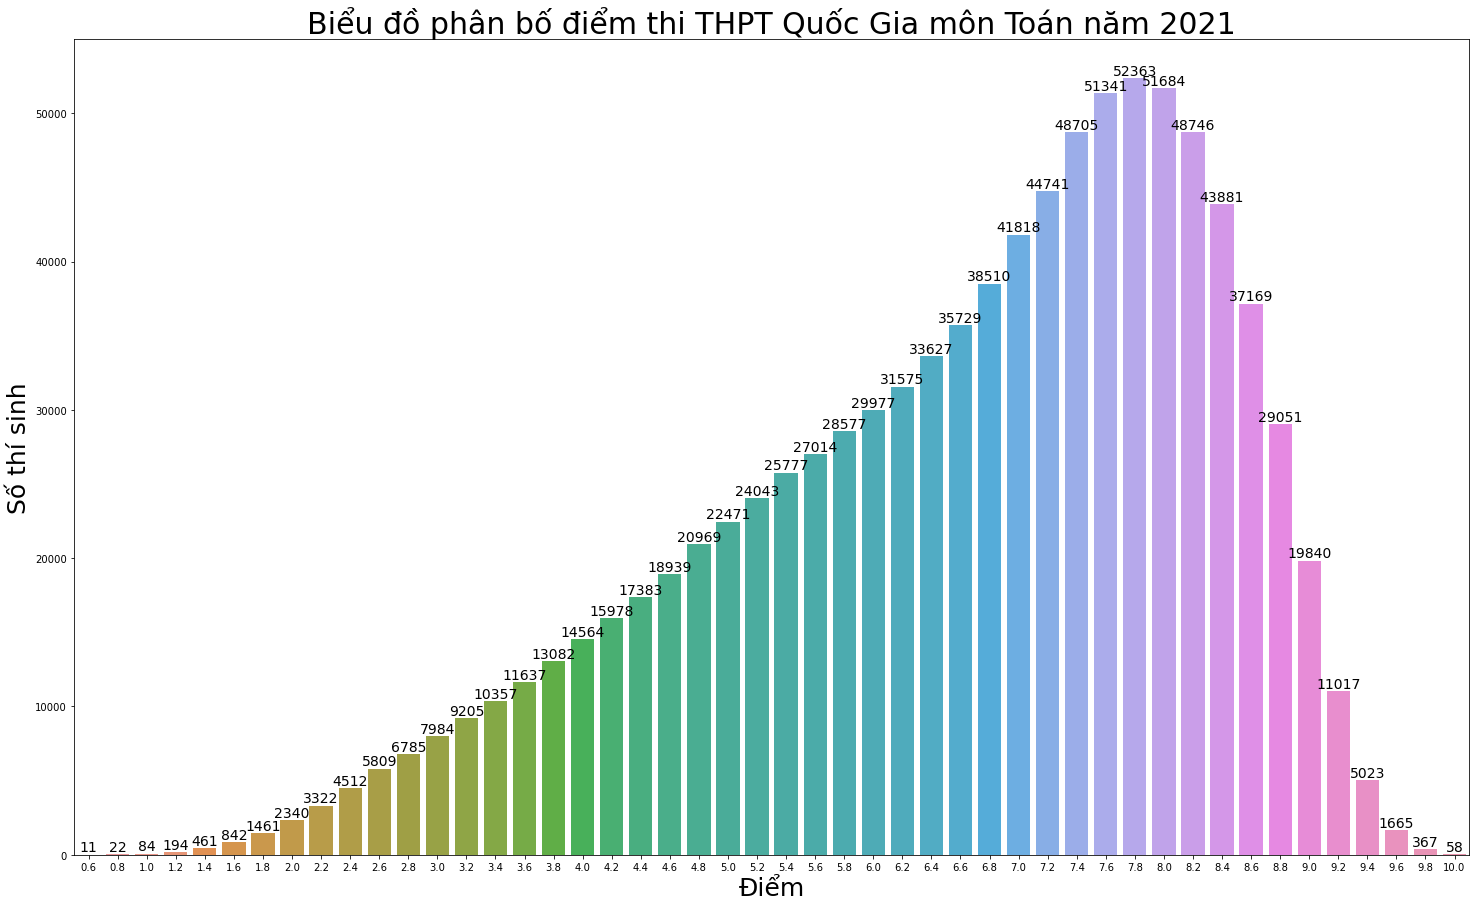

In [11]:
fig, ax = plt.subplots(figsize = (25, 15))
ax = sns.barplot(x = math_df.index, y = math_df.values)

for counts_10 in ax.patches:
  height = counts_10.get_height()
  label_x = counts_10.get_x() + counts_10.get_width() / 2
  label_y = counts_10.get_y() / height + height
  plt.text(label_x, label_y, s = f"{int(height):}", ha='center', va='bottom', color = "black", size = 14)

plt.xlabel('Điểm', fontsize = 25)
plt.ylabel('Số thí sinh', fontsize = 25)
plt.title('Biểu đồ phân bố điểm thi THPT Quốc Gia môn Toán năm 2021', fontsize = 30);

### Nhận xét:
- Điểm số có nhiều thí sinh đạt nhất là 7.8 điểm
- Có 117 thí sinh bị điểm liệt (<= 1 điểm) và 58 thí sinh đạt điểm 10
- Nhìn biểu đồ ta thấy điểm tập trung trong khoảng điểm từ 3 tới 9 và lệch sang bên phải. Sườn đồ thị bên trái mốc điểm 7.8 thì thoải dần còn bên phải gần như dựng đứng.

### b. Ngữ văn

#### Đếm số lượng của từng số điểm thi và xử lí các số điểm thi bị lẻ bằng cách cộng số lượng của điểm đó vào điểm số gần nhất

In [12]:
literature_df = df['literature'].value_counts().sort_index()
x = np.arange(0,10.1,0.25)
for v in literature_df.index:
    if (v not in x):
        literature_df[round(v/0.25)*0.25] += literature_df[v] 
        literature_df = literature_df.drop(index = v)
literature_df.sum()

947914

#### Vẽ phổ điểm thi

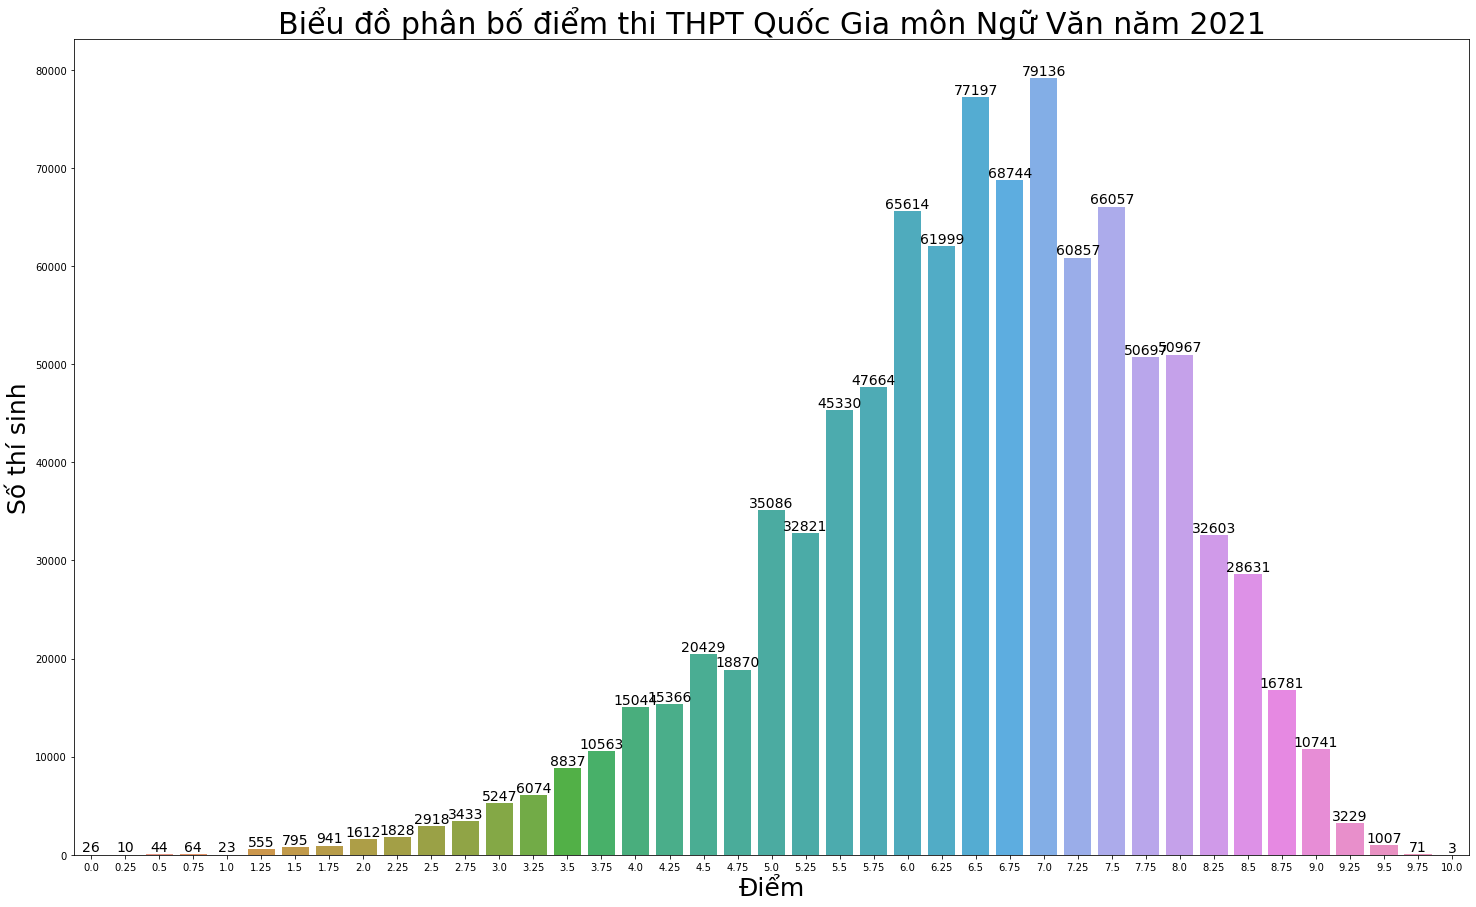

In [13]:
fig, ax = plt.subplots(figsize = (25, 15))
ax = sns.barplot(x = literature_df.index, y = literature_df.values)

for counts_10 in ax.patches:
  height = counts_10.get_height()
  label_x = counts_10.get_x() + counts_10.get_width() / 2
  label_y = counts_10.get_y() / height + height
  plt.text(label_x, label_y, s = f"{int(height):}", ha='center', va='bottom', color = "black", size = 14)

plt.xlabel('Điểm', fontsize = 25)
plt.ylabel('Số thí sinh', fontsize = 25)
plt.title('Biểu đồ phân bố điểm thi THPT Quốc Gia môn Ngữ Văn năm 2021', fontsize = 30);

### Nhận xét:
- Điểm số có nhiều thí sinh đạt nhất là 7.0 điểm
- Có 167 thí sinh bị điểm liệt (<= 1 điểm) và 3 thí sinh đạt điểm 10
- Nhìn biểu đồ ta thấy điểm tập trung trong khoảng điểm từ 4 tới dưới 9 và hơi lệch sang bên phải. Sườn đồ thị bên trái và bên phải mốc điểm 6.75 có hình dạng đối xứng nhau

### c. Tiếng anh

#### Đếm số lượng của từng số điểm thi 

In [14]:
english_df = df['english'].value_counts().sort_index()
english_df.sum()

838951

#### Vẽ phổ điểm thi

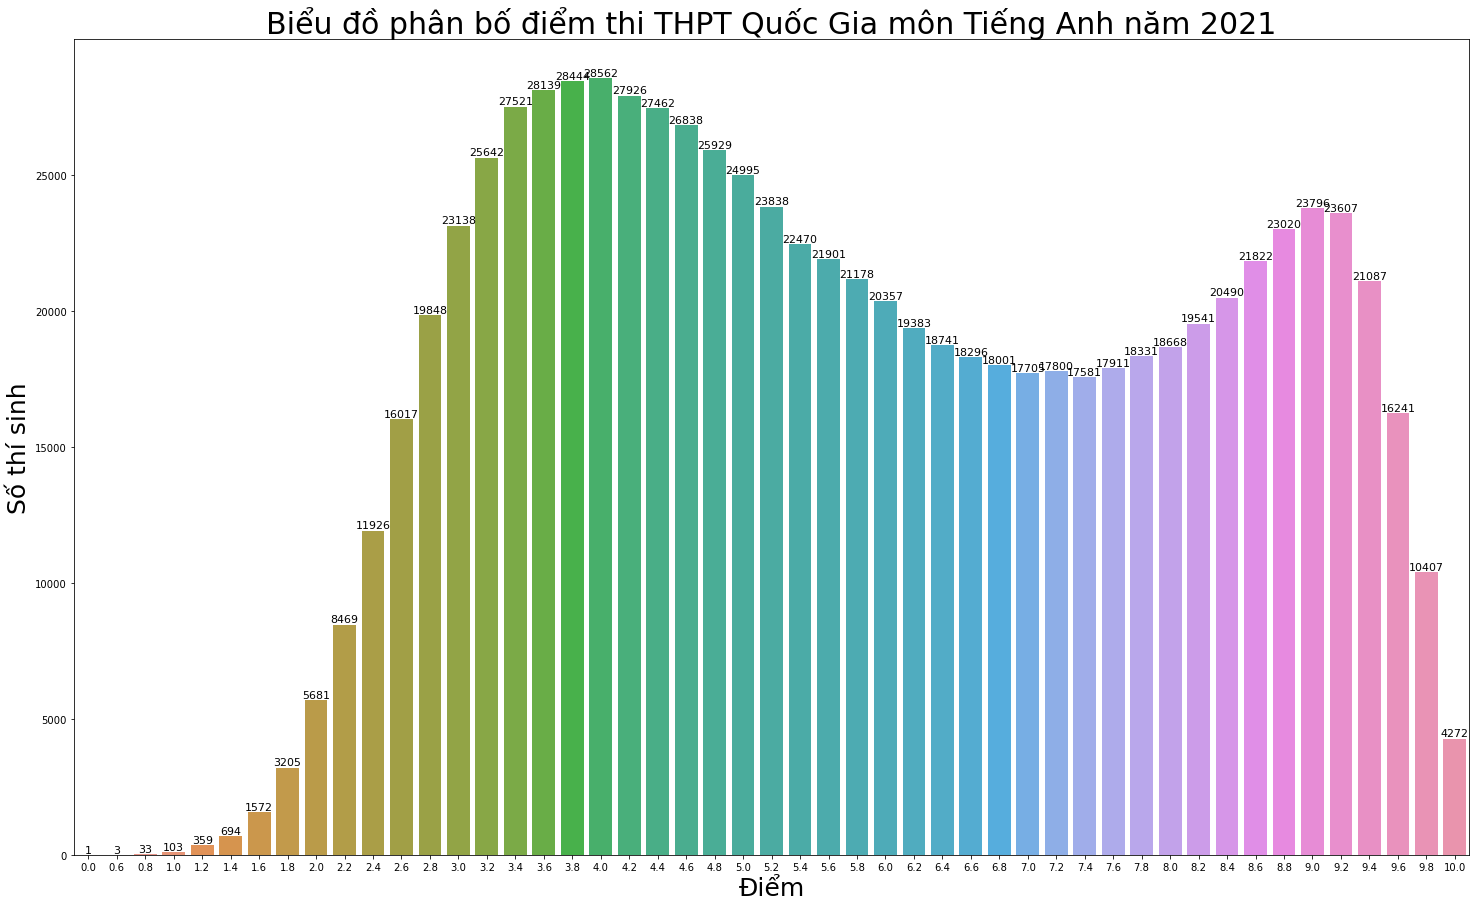

In [15]:
fig, ax = plt.subplots(figsize = (25, 15))
ax = sns.barplot(x = english_df.index, y = english_df.values)

for counts_10 in ax.patches:
  height = counts_10.get_height()
  label_x = counts_10.get_x() + counts_10.get_width() / 2
  label_y = counts_10.get_y() / height + height
  plt.text(label_x, label_y, s = f"{int(height):}", ha='center', va='bottom', color = "black", size = 11)

plt.xlabel('Điểm', fontsize = 25)
plt.ylabel('Số thí sinh', fontsize = 25)
plt.title('Biểu đồ phân bố điểm thi THPT Quốc Gia môn Tiếng Anh năm 2021', fontsize = 30);

### Nhận xét:
- Điểm số có nhiều thí sinh đạt nhất là 4.0 điểm.
- Có 140 thí sinh bị điểm liệt (<= 1 điểm) và 4220 thí sinh đạt điểm 10
- Nhìn biểu đồ ta thấy phổ điểm có 2 đỉnh tập trung ở 2 khoảng xung quanh mốc điểm 4 và 9. Hình dạng khá là đặc biệt, giống như lưng lạc đà. Đề thi này phân hóa rất rõ ràng giữa những thí sinh học lực không tốt và những thí sinh học lực tốt.

### d. Vật lý

#### Đếm số lượng của từng số điểm thi 

In [16]:
physics_df = df['physics'].value_counts().sort_index()
physics_df.sum()

333302

#### Vẽ phổ điểm thi

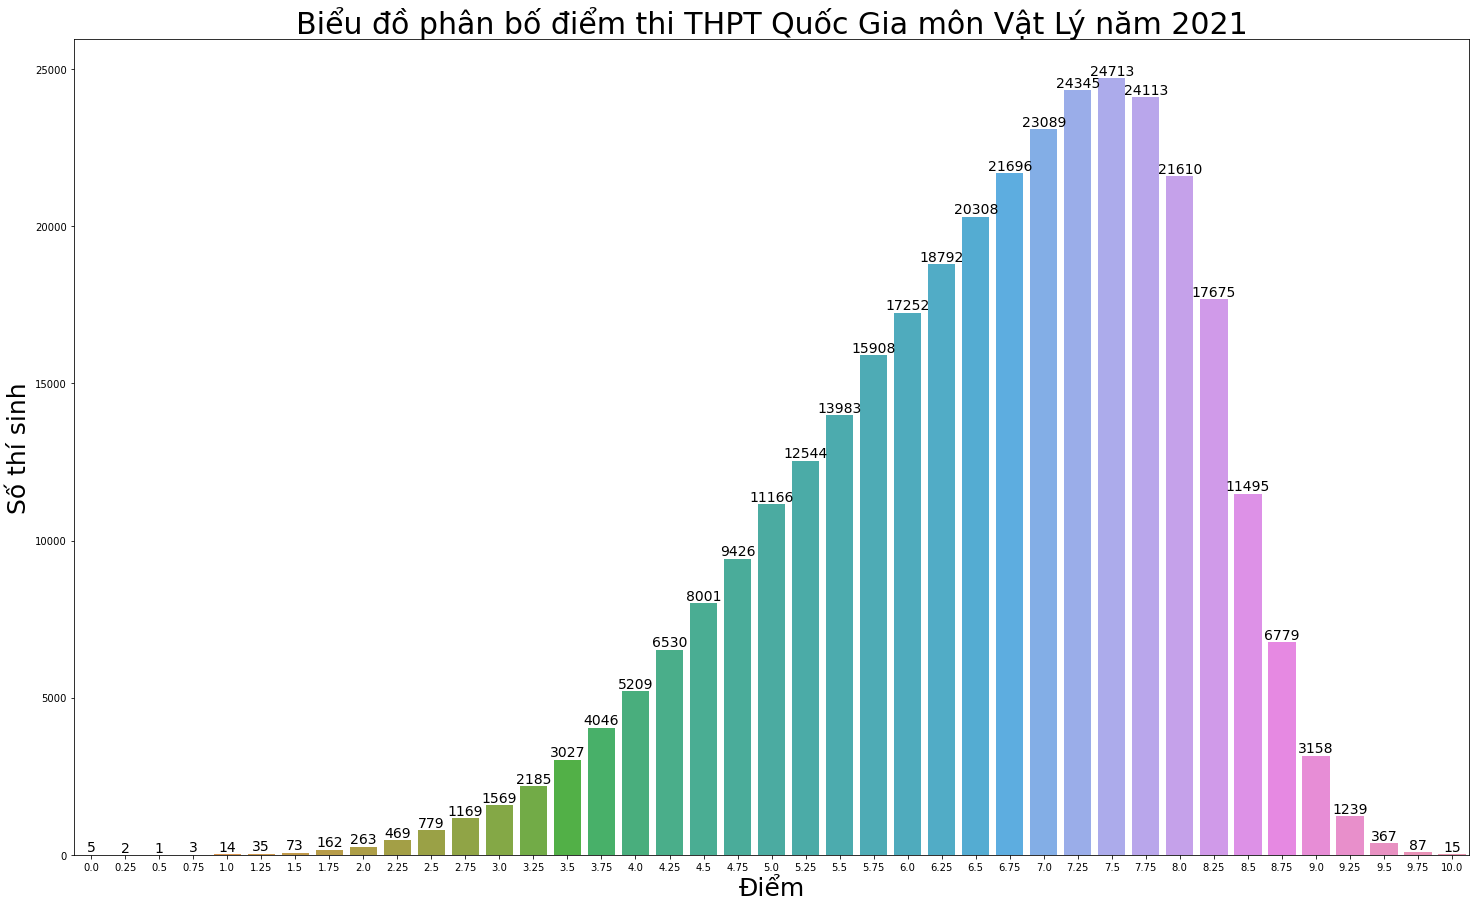

In [17]:
fig, ax = plt.subplots(figsize = (25, 15))
ax = sns.barplot(x = physics_df.index, y = physics_df.values)

for counts_10 in ax.patches:
  height = counts_10.get_height()
  label_x = counts_10.get_x() + counts_10.get_width() / 2
  label_y = counts_10.get_y() / height + height
  plt.text(label_x, label_y, s = f"{int(height):}", ha='center', va='bottom', color = "black", size = 14)

plt.xlabel('Điểm', fontsize = 25)
plt.ylabel('Số thí sinh', fontsize = 25)
plt.title('Biểu đồ phân bố điểm thi THPT Quốc Gia môn Vật Lý năm 2021', fontsize = 30);

### Nhận xét:
- Điểm số có nhiều thí sinh đạt nhất là 7.5 điểm
- Có 25 thí sinh bị điểm liệt (<= 1 điểm) và 14 thí sinh đạt điểm 10
- Nhìn biểu đồ ta thấy điểm tập trung trong khoảng điểm từ 4 tới dưới 9 và lệch sang phải. Sườn đồ thị bên trái mốc điểm 7.5 thì thoải dần còn bên phải thì gần như dựng đứng.

### e. Hóa học

#### Đếm số lượng của từng số điểm thi 

In [18]:
chemistry_df = df['chemistry'].value_counts().sort_index()
chemistry_df.sum()

334902

#### Vẽ phổ điểm thi

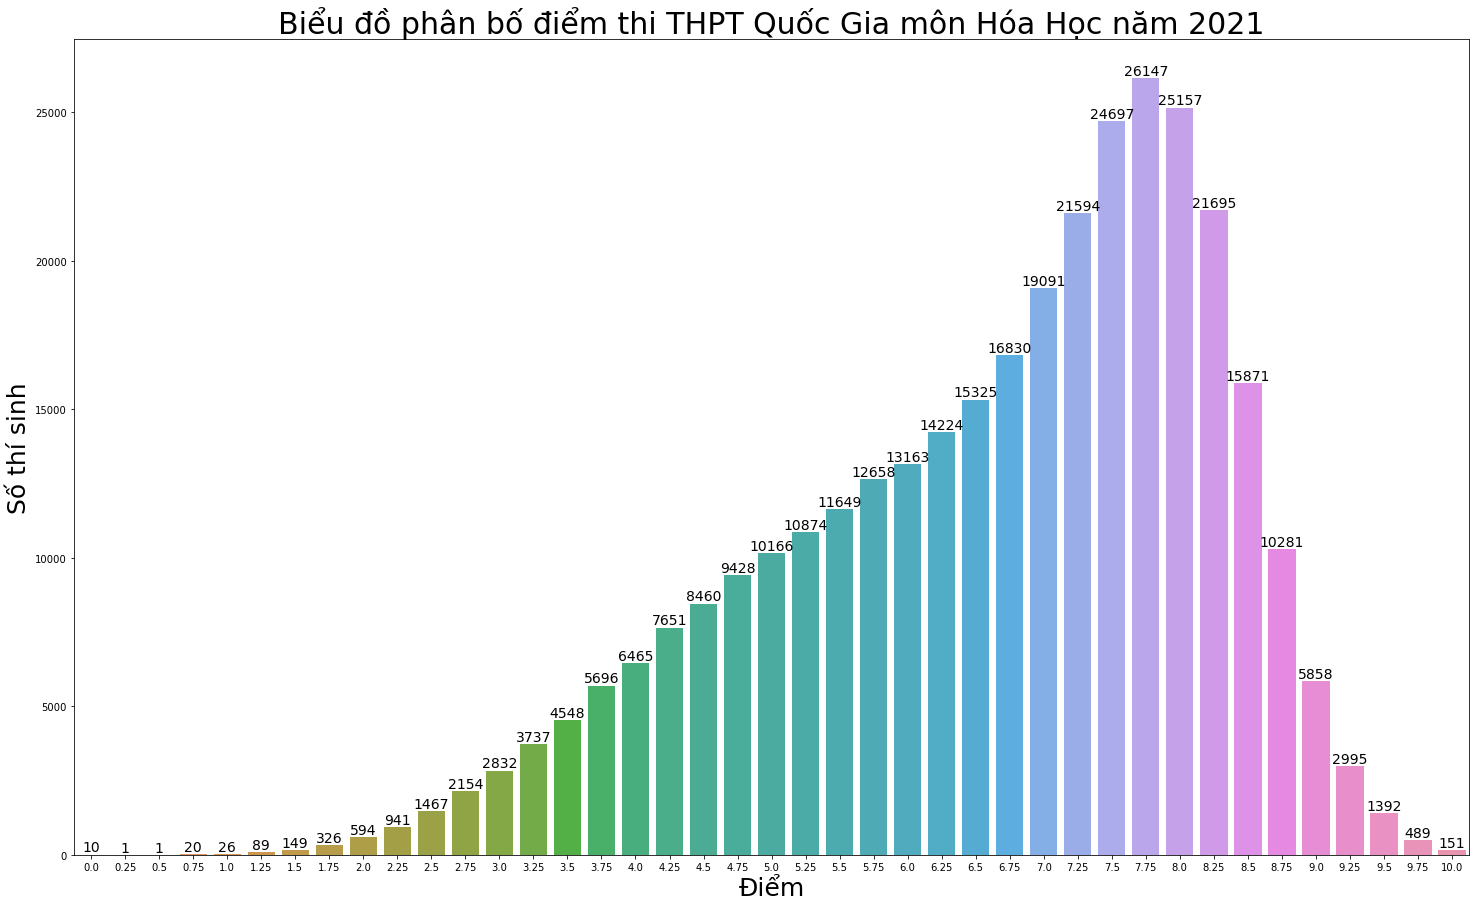

In [19]:
fig, ax = plt.subplots(figsize = (25, 15))
ax = sns.barplot(x = chemistry_df.index, y = chemistry_df.values)

for counts_10 in ax.patches:
  height = counts_10.get_height()
  label_x = counts_10.get_x() + counts_10.get_width() / 2
  label_y = counts_10.get_y() / height + height
  plt.text(label_x, label_y, s = f"{int(height):}", ha='center', va='bottom', color = "black", size = 14)

plt.xlabel('Điểm', fontsize = 25)
plt.ylabel('Số thí sinh', fontsize = 25)
plt.title('Biểu đồ phân bố điểm thi THPT Quốc Gia môn Hóa Học năm 2021', fontsize = 30);

### Nhận xét:
- Điểm số có nhiều thí sinh đạt nhất là 7.75 điểm.
- Có 58 thí sinh bị điểm liệt (<= 1 điểm) và 147 thí sinh đạt điểm 10
- Nhìn biểu đồ ta thấy điểm tập trung trong khoảng điểm từ 4 tới dưới 9 và lệch sang phải. Sườn đồ thị bên trái mốc điểm 7.75 thì thoải dần còn bên phải gần như dựng đứng.

### f. Sinh học

#### Đếm số lượng của từng số điểm thi 

In [20]:
biology_df = df['biology'].value_counts().sort_index()
biology_df.sum()

329550

#### Vẽ phổ điểm thi

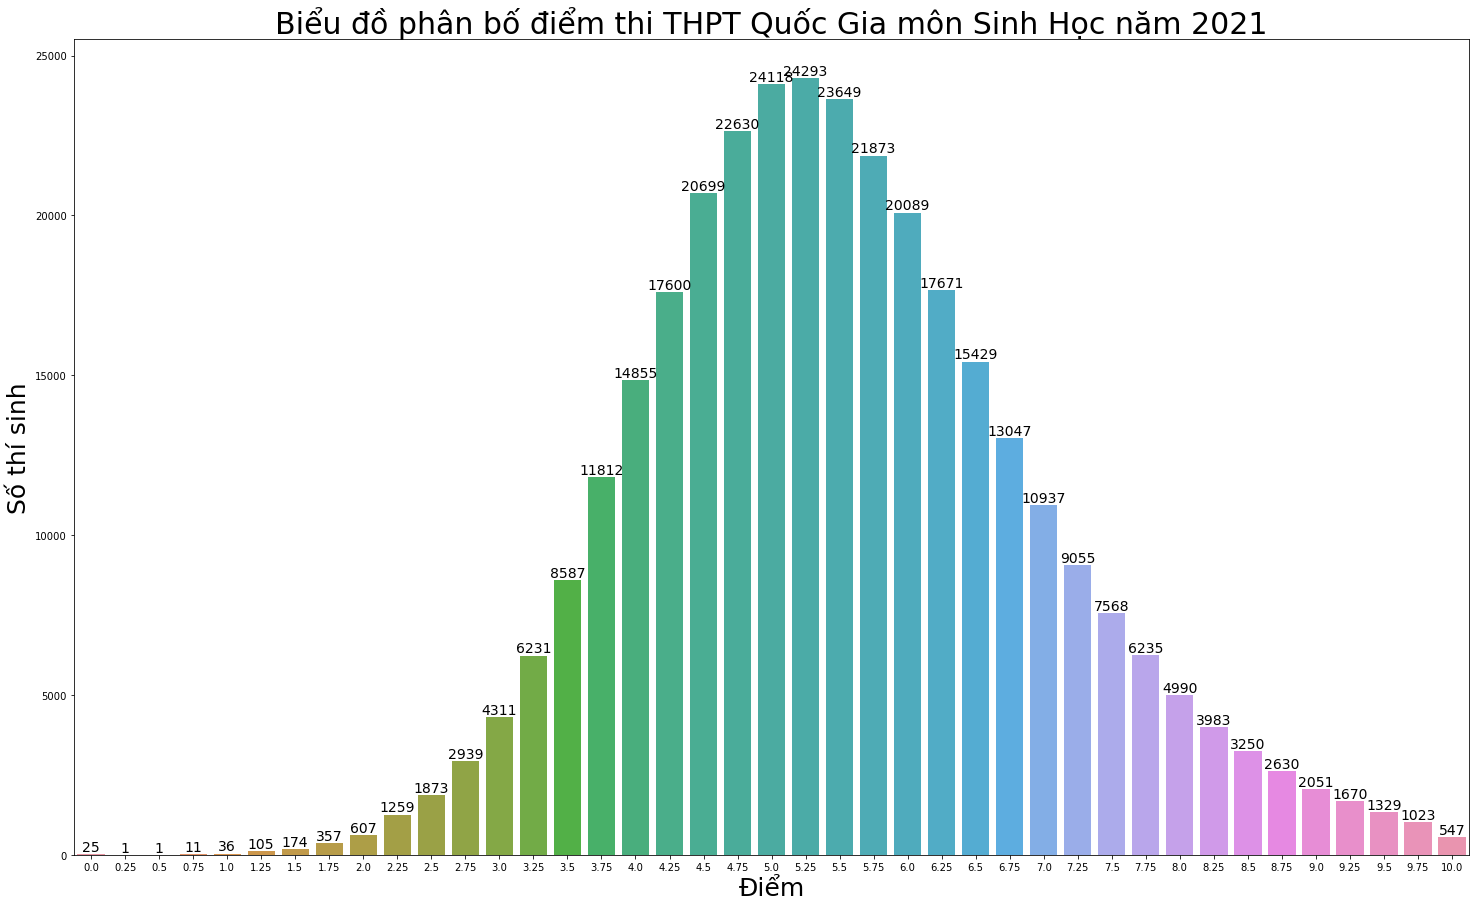

In [21]:
fig, ax = plt.subplots(figsize = (25, 15))
ax = sns.barplot(x = biology_df.index, y = biology_df.values)

for counts_10 in ax.patches:
  height = counts_10.get_height()
  label_x = counts_10.get_x() + counts_10.get_width() / 2
  label_y = counts_10.get_y() / height + height
  plt.text(label_x, label_y, s = f"{int(height):}", ha='center', va='bottom', color = "black", size = 14)

plt.xlabel('Điểm', fontsize = 25)
plt.ylabel('Số thí sinh', fontsize = 25)
plt.title('Biểu đồ phân bố điểm thi THPT Quốc Gia môn Sinh Học năm 2021', fontsize = 30);

### Nhận xét:
- Điểm số có nhiều thí sinh đạt nhất là 5.25 điểm.
- Có 74 thí sinh bị điểm liệt (<= 1 điểm) và 537 thí sinh đạt điểm 10
- Nhìn biểu đồ ta thấy điểm tập trung trong khoảng điểm từ 3.5 tới dưới 8. Sườn bên trái hơi dốc hơn so với sườn bên phải mốc điểm 5, nhưng nhìn tổng quan khá là đối xứng. 

### g. Lịch sử

#### Đếm số lượng của từng số điểm thi 

In [22]:
history_df = df['history'].value_counts().sort_index()
history_df.sum()

619880

#### Vẽ phổ điểm thi

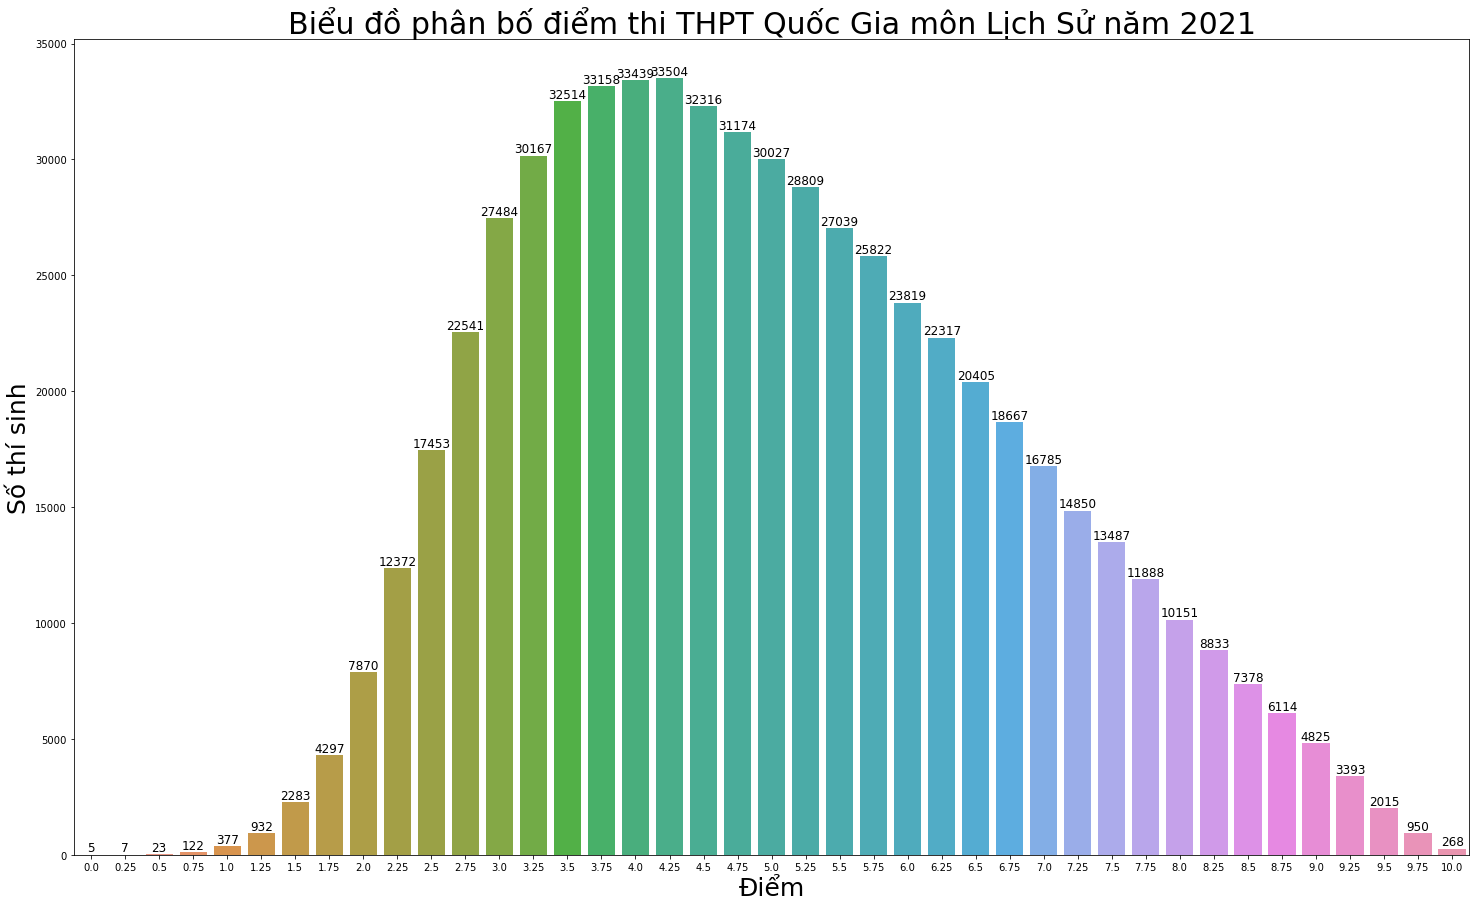

In [23]:
fig, ax = plt.subplots(figsize = (25, 15))
ax = sns.barplot(x = history_df.index, y = history_df.values)

for counts_10 in ax.patches:
  height = counts_10.get_height()
  label_x = counts_10.get_x() + counts_10.get_width() / 2
  label_y = counts_10.get_y() / height + height
  plt.text(label_x, label_y, s = f"{int(height):}", ha='center', va='bottom', color = "black", size = 12)

plt.xlabel('Điểm', fontsize = 25)
plt.ylabel('Số thí sinh', fontsize = 25)
plt.title('Biểu đồ phân bố điểm thi THPT Quốc Gia môn Lịch Sử năm 2021', fontsize = 30);

### Nhận xét:
- Điểm số có nhiều thí sinh đạt nhất là 4.25 điểm.
- Có 534 thí sinh bị điểm liệt (<= 1 điểm) và 256 thí sinh đạt điểm 10
- Nhìn biểu đồ ta thấy điểm tập trung trong khoảng điểm từ 2 tới dưới 8 và lệch về bên trái. Sườn đồ thị bên trái mốc điểm 4 thì dựng đứng còn bên phải thoải dần. Chứng tỏ đề thi Lịch sử năm 2021 khó và làm khó nhiều thí sinh.

### h. Địa lý

#### Đếm số lượng của từng số điểm thi 

In [24]:
geography_df = df['geography'].value_counts().sort_index()
geography_df.sum()

614237

#### Vẽ phổ điểm thi

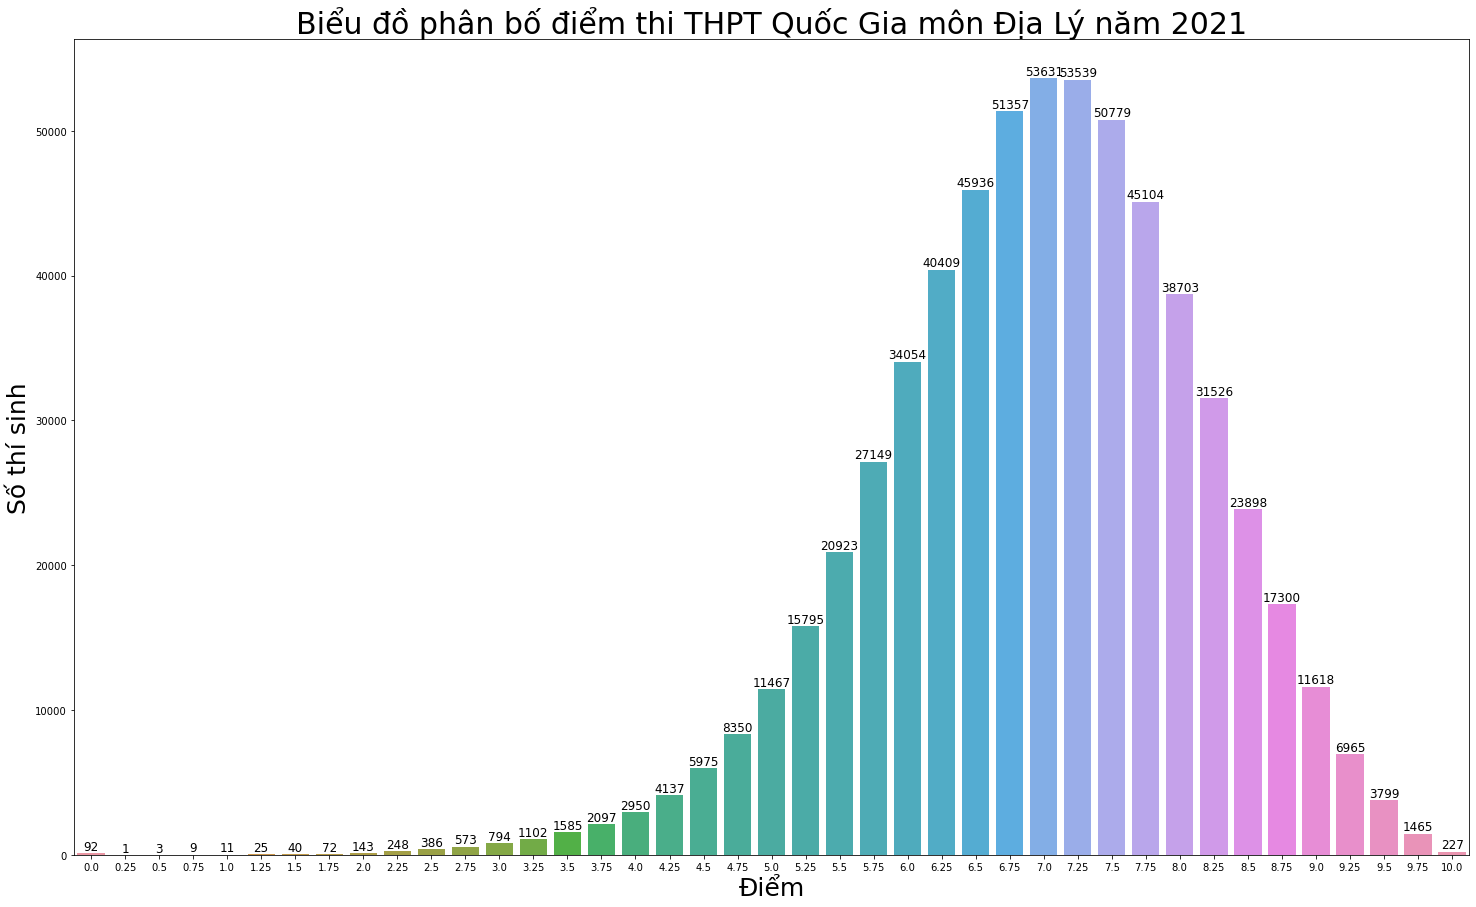

In [25]:
fig, ax = plt.subplots(figsize = (25, 15))
ax = sns.barplot(x = geography_df.index, y = geography_df.values)

for counts_10 in ax.patches:
  height = counts_10.get_height()
  label_x = counts_10.get_x() + counts_10.get_width() / 2
  label_y = counts_10.get_y() / height + height
  plt.text(label_x, label_y, s = f"{int(height):}", ha='center', va='bottom', color = "black", size = 12)

plt.xlabel('Điểm', fontsize = 25)
plt.ylabel('Số thí sinh', fontsize = 25)
plt.title('Biểu đồ phân bố điểm thi THPT Quốc Gia môn Địa Lý năm 2021', fontsize = 30);

### Nhận xét:
- Điểm số có nhiều thí sinh đạt nhất là 7.0 điểm.
- Có 116 thí sinh bị điểm liệt (<= 1 điểm) và 221 thí sinh đạt điểm 10
- Nhìn biểu đồ ta thấy điểm tập trung trong khoảng điểm từ 5 tới 9 và lệch về bên phải. Sườn trái và phải của đồ thị quanh mốc điểm 7 là gần như đối xứng nhau.

### i. Giáo dục công dân

#### Đếm số lượng của từng số điểm thi 

In [26]:
civic_education_df = df['civic_education'].value_counts().sort_index()
civic_education_df.sum()

518859

#### Vẽ phổ điểm thi

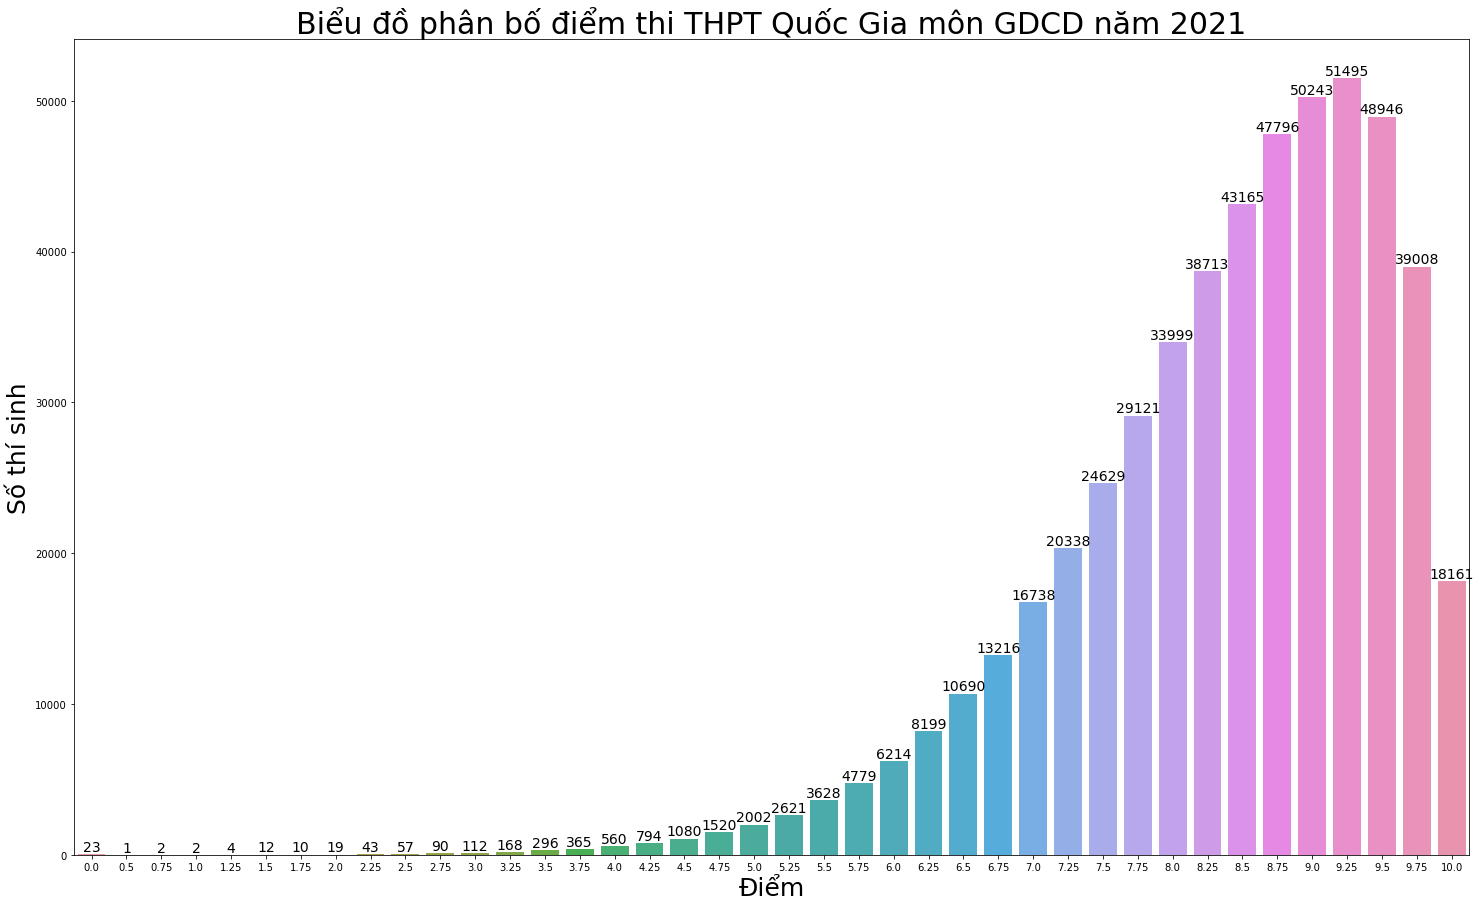

In [27]:
fig, ax = plt.subplots(figsize = (25, 15))
ax = sns.barplot(x = civic_education_df.index, y = civic_education_df.values)

for counts_10 in ax.patches:
  height = counts_10.get_height()
  label_x = counts_10.get_x() + counts_10.get_width() / 2
  label_y = counts_10.get_y() / height + height
  plt.text(label_x, label_y, s = f"{int(height):}", ha='center', va='bottom', color = "black", size = 14)

plt.xlabel('Điểm', fontsize = 25)
plt.ylabel('Số thí sinh', fontsize = 25)
plt.title('Biểu đồ phân bố điểm thi THPT Quốc Gia môn GDCD năm 2021', fontsize = 30);

### Nhận xét:
- Điểm số có nhiều thí sinh đạt nhất là 9.25 điểm.
- Có 28 thí sinh bị điểm liệt (<= 1 điểm) và 17700 thí sinh đạt điểm 10
- Nhìn biểu đồ ta thấy điểm tập trung trong khoảng điểm từ 6.5 tới 10 và lệch hẳn về bên phải. Sườn đồ thị bên trái mốc điểm 9.25 thì thoải dần. Chứng tỏ đề thi GDCD năm 2o21 không làm khó được các thí sinh dự thi.

### k. Tiếng Nga

#### Đếm số lượng của từng số điểm thi 

In [28]:
russian_df = df['russian'].value_counts().sort_index()
russian_df.sum()

103

#### Vẽ phổ điểm thi

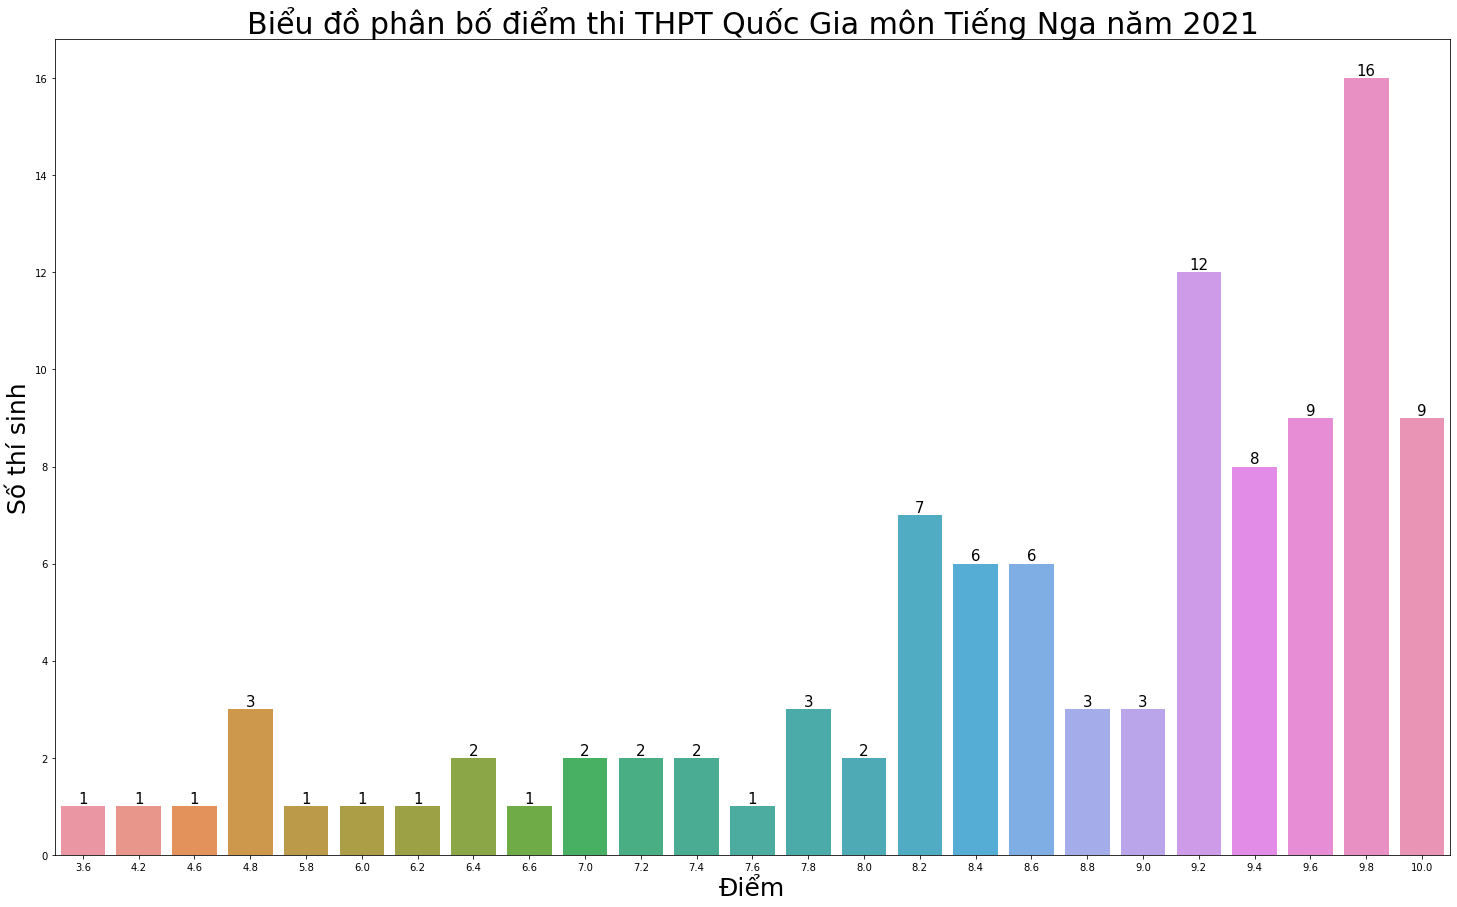

In [29]:
fig, ax = plt.subplots(figsize = (25, 15))
ax = sns.barplot(x = russian_df.index, y = russian_df.values)

for counts_10 in ax.patches:
  height = counts_10.get_height()
  label_x = counts_10.get_x() + counts_10.get_width() / 2
  label_y = counts_10.get_y() / height + height
  plt.text(label_x, label_y, s = f"{int(height):}", ha='center', va='bottom', color = "black", size = 15)

plt.xlabel('Điểm', fontsize = 25)
plt.ylabel('Số thí sinh', fontsize = 25)
plt.title('Biểu đồ phân bố điểm thi THPT Quốc Gia môn Tiếng Nga năm 2021', fontsize = 30);

### Nhận xét:
- Điểm số có nhiều thí sinh đạt nhất là 9.8 điểm.
- Không thí sinh nào bị điểm liệt (<= 1 điểm) và 9 thí sinh đạt điểm 10
- Có rất ít thí sinh lựa chọn Tiếng Nga là môn thi Ngoại ngữ 2 nên hình dạng đồ thị trải đều và không có gì đặc biệt

### l. Tiếng Pháp

#### Đếm số lượng của từng số điểm thi 

In [30]:
french_df = df['french'].value_counts().sort_index()
french_df.sum()

795

#### Vẽ phổ điểm thi

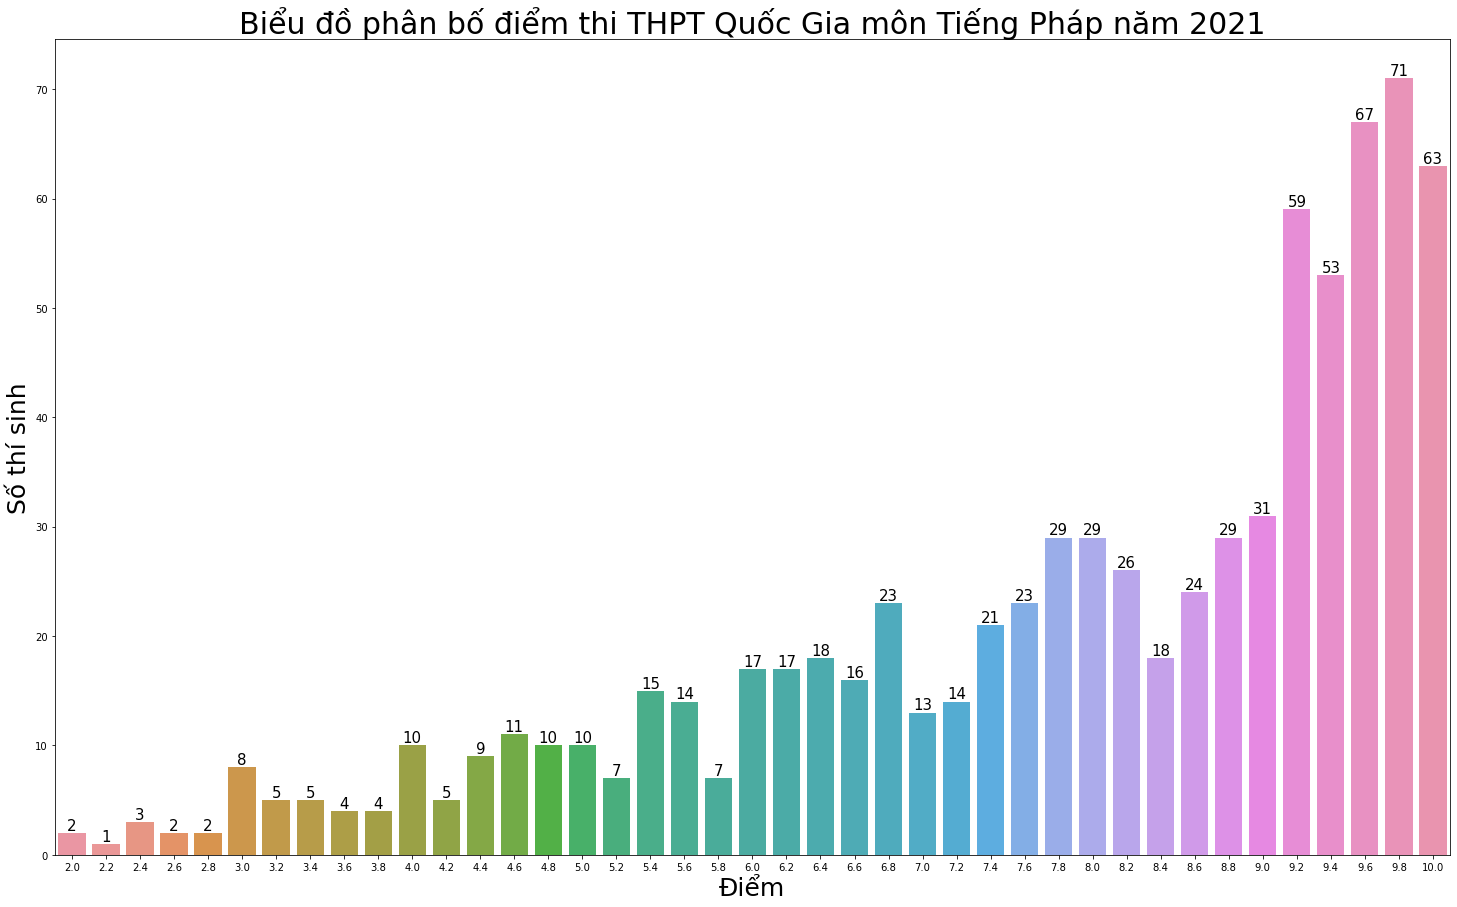

In [31]:
fig, ax = plt.subplots(figsize = (25, 15))
ax = sns.barplot(x = french_df.index, y = french_df.values)

for counts_10 in ax.patches:
  height = counts_10.get_height()
  label_x = counts_10.get_x() + counts_10.get_width() / 2
  label_y = counts_10.get_y() / height + height
  plt.text(label_x, label_y, s = f"{int(height):}", ha='center', va='bottom', color = "black", size = 15)

plt.xlabel('Điểm', fontsize = 25)
plt.ylabel('Số thí sinh', fontsize = 25)
plt.title('Biểu đồ phân bố điểm thi THPT Quốc Gia môn Tiếng Pháp năm 2021', fontsize = 30);

### Nhận xét:
- Điểm số có nhiều thí sinh đạt nhất là 9.8 điểm.
- Không có thí sinh nào bị điểm liệt (<= 1 điểm) và 62 thí sinh đạt điểm 10
- Nhìn biểu đồ ta thấy điểm tập trung trong khoảng điểm rất cao (trên 8 điểm). Hình dạng đồ thị tổng quan thì cao dần về bên phải.

### m. Tiếng Trung Quốc

#### Đếm số lượng của từng số điểm thi 

In [32]:
chinese_df = df['chinese'].value_counts().sort_index()
chinese_df.sum()

2157

#### Vẽ phổ điểm thi

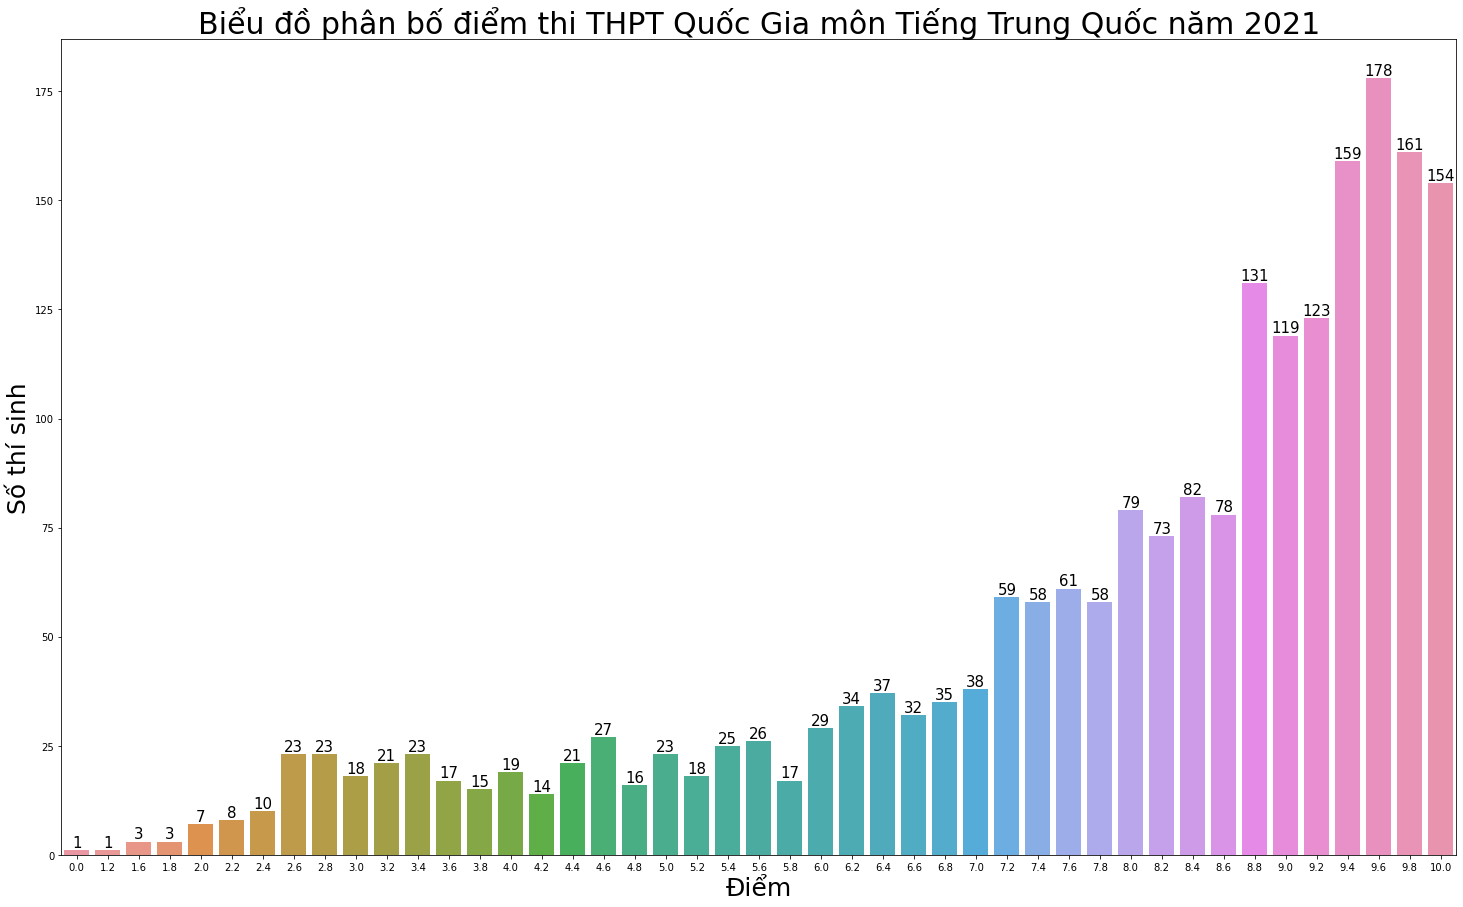

In [33]:
fig, ax = plt.subplots(figsize = (25, 15))
ax = sns.barplot(x = chinese_df.index, y = chinese_df.values)

for counts_10 in ax.patches:
  height = counts_10.get_height()
  label_x = counts_10.get_x() + counts_10.get_width() / 2
  label_y = counts_10.get_y() / height + height
  plt.text(label_x, label_y, s = f"{int(height):}", ha='center', va='bottom', color = "black", size = 15)

plt.xlabel('Điểm', fontsize = 25)
plt.ylabel('Số thí sinh', fontsize = 25)
plt.title('Biểu đồ phân bố điểm thi THPT Quốc Gia môn Tiếng Trung Quốc năm 2021', fontsize = 30);

### Nhận xét:
- Điểm số có nhiều thí sinh đạt nhất là 9.6 điểm.
- Có 1 thí sinh bị điểm liệt (<= 1 điểm) và 142 thí sinh đạt điểm 10
- Nhìn biểu đồ ta thấy điểm tập trung trong khoảng điểm rất cao (trên 7 điểm). Hình dạng đồ thị tổng quan thì cao dần về bên phải.

### n. Tiếng Đức

#### Đếm số lượng của từng số điểm thi 

In [34]:
german_df = df['german'].value_counts().sort_index()
german_df.sum()

109

#### Vẽ phổ điểm thi

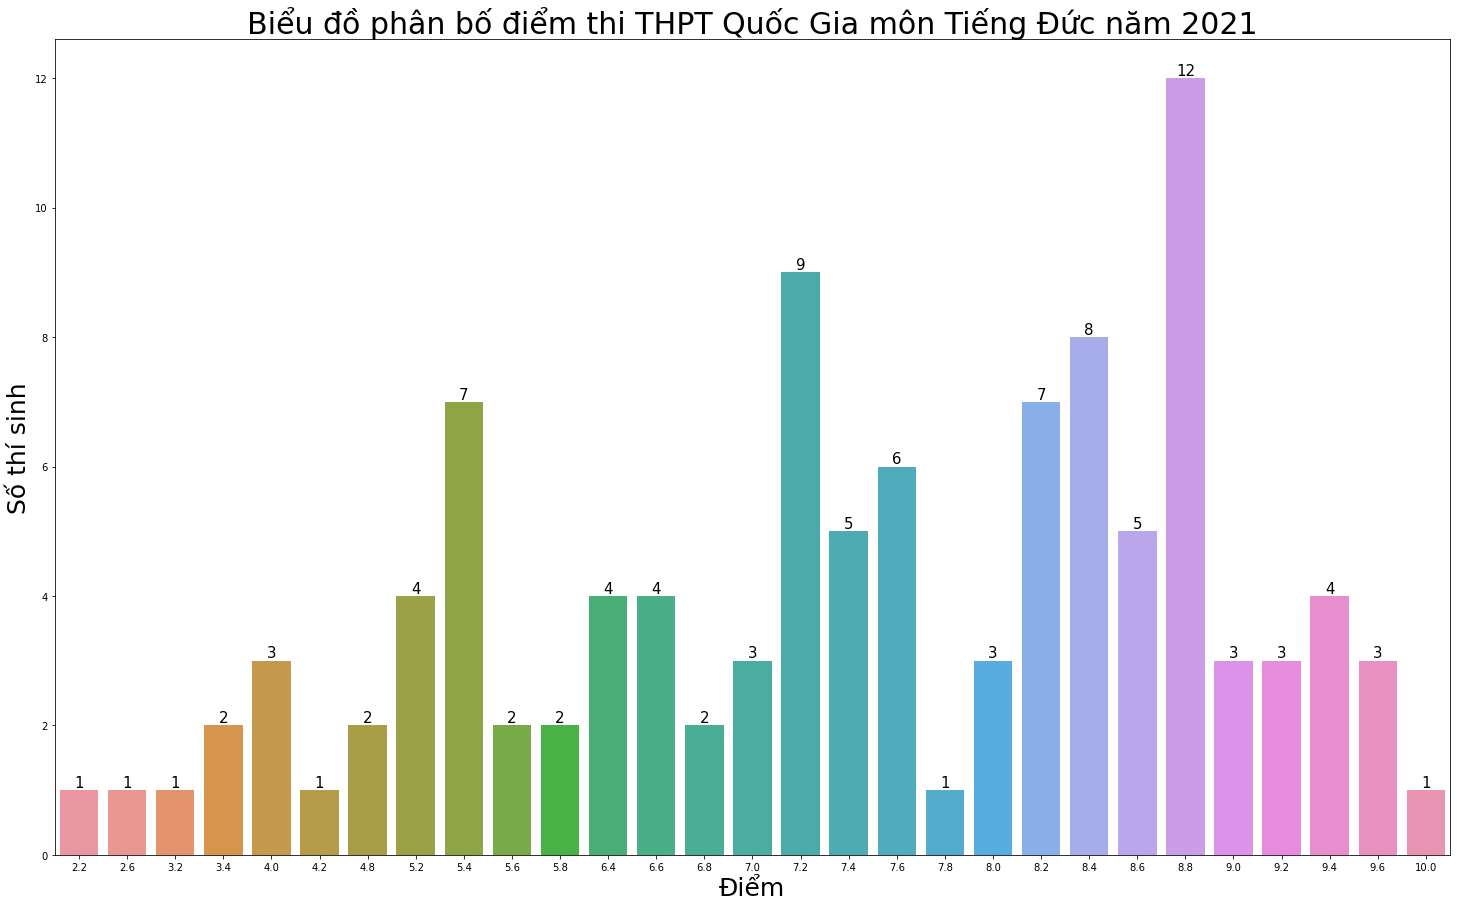

In [35]:
fig, ax = plt.subplots(figsize = (25, 15))
ax = sns.barplot(x = german_df.index, y = german_df.values)

for counts_10 in ax.patches:
  height = counts_10.get_height()
  label_x = counts_10.get_x() + counts_10.get_width() / 2
  label_y = counts_10.get_y() / height + height
  plt.text(label_x, label_y, s = f"{int(height):}", ha='center', va='bottom', color = "black", size = 15)

plt.xlabel('Điểm', fontsize = 25)
plt.ylabel('Số thí sinh', fontsize = 25)
plt.title('Biểu đồ phân bố điểm thi THPT Quốc Gia môn Tiếng Đức năm 2021', fontsize = 30);

### Nhận xét:
- Điểm số có nhiều thí sinh đạt nhất là 8.8 điểm.
- Không có thí sinh nào bị điểm liệt (<= 1 điểm) và 1 thí sinh đạt điểm 10
- Ta thấy có rất ít thí sinh chọn thi Ngoại ngữ 2 là tiếng Đức nên hình dạng đồ thị trải đều và không có bất định.

### o. Tiếng Nhật

#### Đếm số lượng của từng số điểm thi 

In [36]:
japanese_df = df['japanese'].value_counts().sort_index()
japanese_df.sum()

1007

#### Vẽ phổ điểm thi

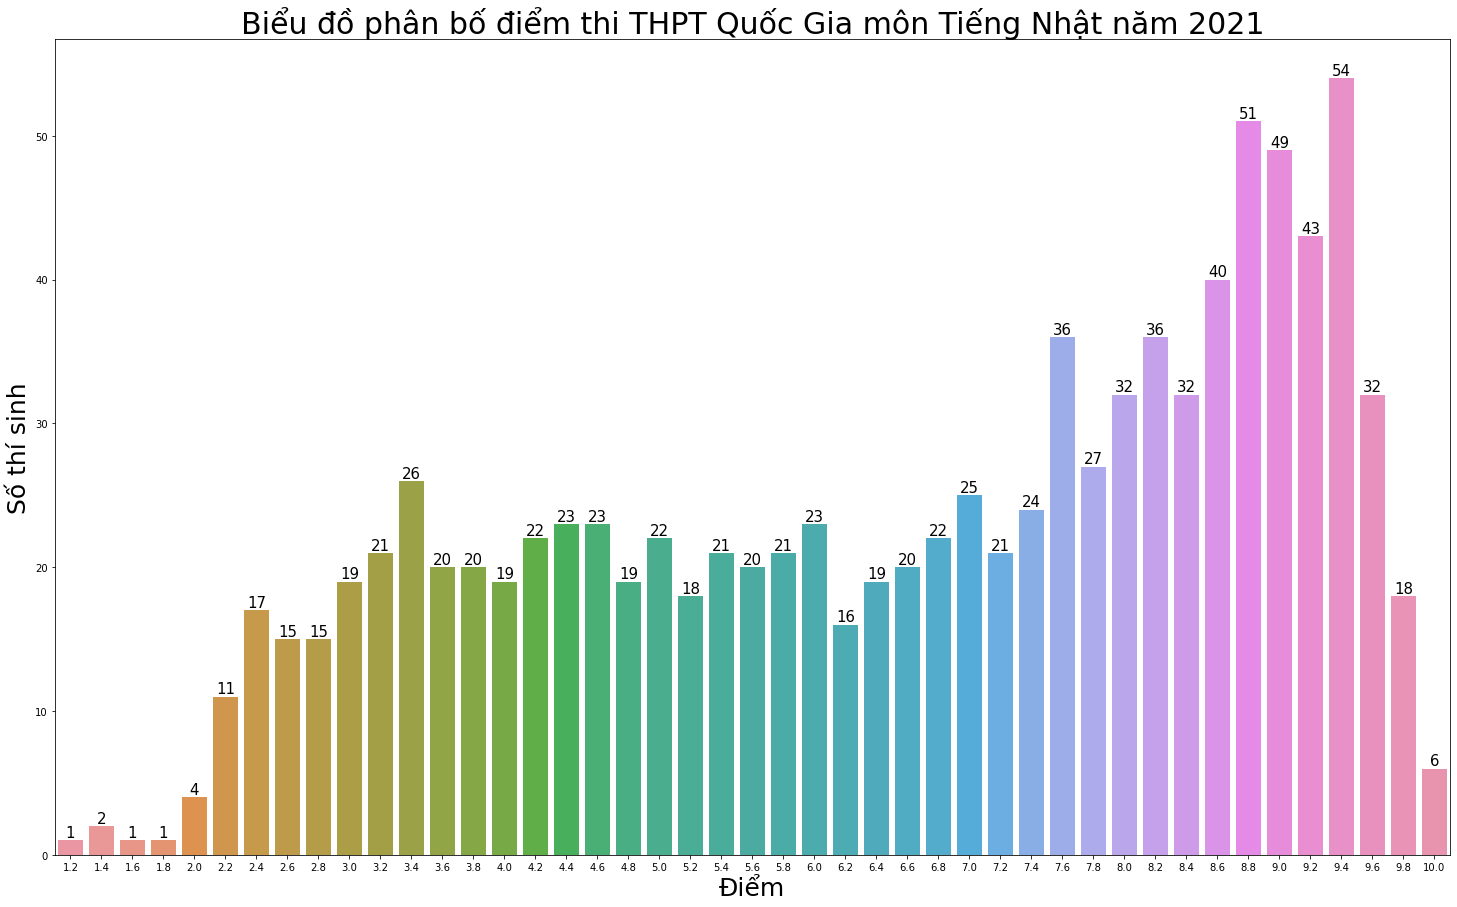

In [37]:
fig, ax = plt.subplots(figsize = (25, 15))
ax = sns.barplot(x = japanese_df.index, y = japanese_df.values)
for counts_10 in ax.patches:
  height = counts_10.get_height()
  label_x = counts_10.get_x() + counts_10.get_width() / 2
  label_y = counts_10.get_y() / height + height
  plt.text(label_x, label_y, s = f"{int(height):}", ha='center', va='bottom', color = "black", size = 15)

plt.xlabel('Điểm', fontsize = 25)
plt.ylabel('Số thí sinh', fontsize = 25)
plt.title('Biểu đồ phân bố điểm thi THPT Quốc Gia môn Tiếng Nhật năm 2021', fontsize = 30);

### Nhận xét:
- Điểm số có nhiều thí sinh đạt nhất là 9.4 điểm.
- Không có thí sinh nào bị điểm liệt (<= 1 điểm) và 6 thí sinh đạt điểm 10
- Nhìn vào đồ thị ta thấy hình dạng của nó khá ngang bằng ở khoảng điểm từ 2 tới dưới 7. Còn khoảng điểm bên phải thì cao hơn. 

## Câu hỏi 2

### Nội dung câu hỏi
Thống kê số lượng học sinh chọn thi bài thi tổ hợp

### Ý nghĩa khi trả lời câu hỏi
Giúp chúng ta có cái nhìn tổng quan về số lượng học sinh lựa chọn giữa bài thi tổ hợp tự nhiên và xã hội. Từ đó đưa ra nhận xét về khối tự nhiên và xã hội

### Tiền xử lý

Bài thi tổ hợp xã hội gồm có: Lịch sử, Địa lý, GDCD.

Lọc ra những học sinh thi bài thi tổ hợp xã hội. Những học sinh thi xã hội sẽ có điểm thi các môn tổ hợp xã hội khác `NaN`, điểm thi các môn tổ hợp tự nhiên có giá trị bằng `NaN`

In [38]:
#Ban xa hoi
social_science = df.loc[(np.isnan(df['physics']))& (np.isnan(df['chemistry'])) & (np.isnan(df['biology'])) & (np.isnan(
    df['history']) == False) & (np.isnan(df['geography']) == False) & (np.isnan(df['civic_education']) == False)]


In [39]:
social_science.head()

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese
0,1000002,9.2,NaN,NaN,NaN,5.75,9.75,8.25,9.25,10.0,NaN,NaN,NaN,NaN,NaN
4,1000006,8.0,NaN,NaN,NaN,5.00,6.50,8.75,9.25,8.6,NaN,NaN,NaN,NaN,NaN
7,1000009,8.0,NaN,NaN,NaN,5.25,8.00,8.00,9.00,8.4,NaN,NaN,NaN,NaN,NaN
9,1000011,6.0,NaN,NaN,NaN,3.00,7.25,7.75,8.50,8.2,NaN,NaN,NaN,NaN,NaN
10,1000012,6.4,NaN,NaN,NaN,5.50,7.00,6.75,7.50,7.8,NaN,NaN,NaN,NaN,NaN


Bài thi tổ hợp tự nhiên gồm có: Vật lý, Hóa học, Sinh học

Lọc ra những học sinh thi bài thi tổ hợp tự nhiên. Những học sinh thi tự nhiên sẽ có điểm thi các môn tổ hợp tự nhiên khác `NaN`, điểm thi các môn tổ hợp xã hội có giá trị bằng `NaN`

In [40]:
#Ban tu nhien
natural_science = df.loc[(np.isnan(df['physics']) == False)& (np.isnan(df['chemistry']) == False) & (np.isnan(df['biology']) == False) & (np.isnan(
    df['history']) == True) & (np.isnan(df['geography']) == True) & (np.isnan(df['civic_education']) == True)]


In [41]:
natural_science.head()

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese
2,1000004,8.4,4.00,3.00,3.50,NaN,NaN,6.75,NaN,10.0,NaN,NaN,NaN,NaN,NaN
3,1000005,8.8,8.25,5.75,5.25,NaN,NaN,8.25,NaN,9.4,NaN,NaN,NaN,NaN,NaN
5,1000007,9.0,7.25,4.75,3.50,NaN,NaN,5.25,NaN,9.0,NaN,NaN,NaN,NaN,NaN
8,1000010,8.8,8.75,8.75,3.00,NaN,NaN,6.25,NaN,9.2,NaN,NaN,NaN,NaN,NaN
15,1000017,7.8,7.50,8.00,7.25,NaN,NaN,8.00,NaN,9.6,NaN,NaN,NaN,NaN,NaN


Những học sinh không chọn thi tổ hợp nào

Lọc ra những học sinh không thi bất kỳ 1 bài thi tổ hợp nào. Do đó sẽ có điểm thi các môn của 2 bài thi tổ hợp có giá trị bằng `NaN`

In [42]:
null = df.loc[(np.isnan(df['physics']))& (np.isnan(df['chemistry'])) & (np.isnan(df['biology'])) & (np.isnan(
    df['history']) == True) & (np.isnan(df['geography']) == True) & (np.isnan(df['civic_education']) == True)]

In [43]:
null.head()

,id_examinee,math,physics,chemistry,biology,history,geography,literature,civic_education,english,russian,french,chinese,german,japanese
28,1000030,8.2,NaN,NaN,NaN,NaN,NaN,7.75,NaN,9.2,NaN,NaN,NaN,NaN,NaN
76,1000080,7.4,NaN,NaN,NaN,NaN,NaN,9.00,NaN,9.6,NaN,NaN,NaN,NaN,NaN
160,1000164,8.4,NaN,NaN,NaN,NaN,NaN,8.75,NaN,9.4,NaN,NaN,NaN,NaN,NaN
161,1000165,6.8,NaN,NaN,NaN,NaN,NaN,8.00,NaN,7.8,NaN,NaN,NaN,NaN,NaN
222,1000226,8.2,NaN,NaN,NaN,NaN,NaN,9.00,NaN,8.4,NaN,NaN,NaN,NaN,NaN


In [44]:
dict_nums_of_students ={
    "Natural Science": len(natural_science),
    "Social Science": len(social_science), 
    "None": len(null)
}

In [45]:
dict_nums_of_students

{'Natural Science': 326378, 'Social Science': 518659, 'None': 4193}

Biểu đồ cột thể hiện số lượng học sinh chọn những bài thi tổ hợp

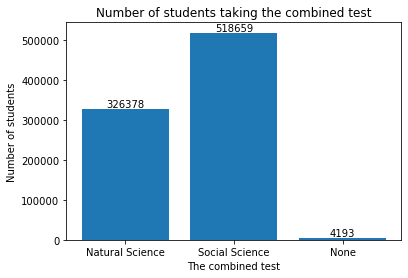

In [46]:
plt.bar(dict_nums_of_students.keys(),dict_nums_of_students.values())
for i in range(len(dict_nums_of_students.keys())):
    plt.text(i,list(dict_nums_of_students.values())[i],list(dict_nums_of_students.values())[i],ha='center', va='bottom')

plt.title('Number of students taking the combined test')
plt.ylabel('Number of students')
plt.xlabel('The combined test');

Biểu đồ tròn thể hiện phần trăm số lượng học sinh chọn bài thi tổ hợp

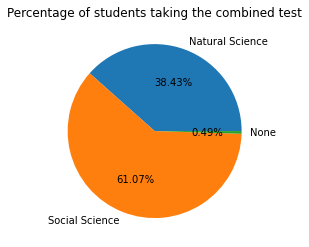

In [47]:
plt.pie(dict_nums_of_students.values(),labels=dict_nums_of_students.keys(),autopct='%0.2f%%')
plt.title("Percentage of students taking the combined test");

Nhận xét:

- Từ biểu đồ có thể thấy, số lượng học sinh chọn bài thi tổ hợp xã hội chiếm nhiều nhất, gấp hơn 1.5 lần số lượng học sinh chọn bài thi tổ hợp tự nhiên
- Có 0.49% ~ 4044 học sinh không chọn bài thi tổ hợp nào, có thể những học sinh đó đã bỏ thi tốt nghiệp
- Số lượng học sinh chọn bài thi tổ hợp xã hội nhiều hơn tự nhiên có thể vì một số học sinh chỉ thi tốt nghiệp và không dùng điểm đó để xét Đại học, cho nên lựa chọn bài thi xã hội sẽ đỡ vất vả hơn

## Câu hỏi 3: 
### Nội dung câu hỏi
Đánh giá số lượng học sinh đậu tốt nghiệp của các tỉnh: 

### Ý nghĩa
Đánh giá tổng quan được tình hình học tập dựa trên tỉ lệ tốt nghiệp của mỗi tỉnh.

### Liệt kê tên  các tỉnh có trong bộ data: 

Theo mô tả của bộ data thì 2 chữ số đầu trong cột 'id_examinee' là id của tỉnh. Do đó để biết được điểm của từng tỉnh thì chúng ta phải lấy được danh sách các tỉnh qua từ đó so sánh với mã tỉnh và lưu về data riêng của mỗi tỉnh.

In [48]:
Provinces_Id = pd.read_csv('archive/Matinh.txt',names=['ID']);
Provinces_Id

,ID
0,Mã tỉnh: 01 - Hà nội
1,Mã tỉnh: 02 - TP. Hồ Chí Minh
2,Mã tỉnh: 03 - Hải Phòng
3,Mã tỉnh: 04 - Đà Nẵng
4,Mã tỉnh: 05 - Hà Giang
...,...
58,Mã tỉnh: 60 – Bạc Liêu
59,Mã tỉnh: 61 – Cà Mau
60,Mã tỉnh: 62 – Điện Biên
61,Mã tỉnh: 63 – Đăk Nông


Xử lý file text thành file .csv cho dễ xử lý sau này.

In [49]:
Id_col=[]
Name_col=[]
Matinh={}
for i in Provinces_Id.ID:
    i=i.replace('Mã tỉnh: ','')
    string = i.replace(' – ','-')
    string = string.replace(' - ','-')
    string = string.split('-')
    Matinh[int(string[0].replace(' ',''))] = string[1]

### Xử lí dữ liệu ở cột ID_examinee: 

### Tính tỉ lệ đậu tốt nghiệp của các tỉnh: 
+ Ở đây sẽ có 2 chương trình để xét tốt nghiệp đó là chương trình Giáo dục thường xuyên và chương trình Chính quy.
+ Đối với giáo dục thường xuyên thì sẽ không cần xét bài thi ngoại ngữ tức là các môn tiếng anh, tiếng nhật, tiếng pháp,...
+ Còn với chương trình chính quy sẽ phải tính cả điểm bài thi ngoại ngữ.
+ Cách xét điểm chuẩn đậu tốt nghiệp là tất cả các bài thi phải có điểm >=1 và điểm 2 môn bắt buộc( sẽ là 3 nếu là chương trình Chính quy) cùng với điểm của ban mà thí sinh dự thi có trung bình >=5 
+ Cách xét thông thường sẽ có điểm trung bình của lớp 12 nhưng ở đây sẽ chỉ xét điểm thi THPT.

In [50]:
def TiLeTotNghiep():

    score_department = df.copy(deep = True)
    score_department.insert(loc=15,column='Language', value=np.zeros(960902))
    
    score_department.english = score_department.english.fillna(0)
    score_department.russian = score_department.russian.fillna(0)
    score_department.french = score_department.french.fillna(0)
    score_department.chinese = score_department.chinese.fillna(0)
    score_department.german = score_department.german.fillna(0)
    score_department.japanese = score_department.japanese.fillna(0)
    score_department.Language = score_department.english + score_department.russian + score_department.french + score_department.chinese + score_department.german + score_department.japanese
    temp = score_department
    score_department_GDTX = temp[temp.Language == 0].drop(['Language','english','russian','french','chinese','german', 'japanese'],axis=1)
    score_department_GDTX=score_department_GDTX.dropna(thresh=5)
    TiLe={}
    fail = score_department[(score_department['math']<1) | (score_department['literature']<1) | (score_department['physics']<1) | (score_department['chemistry']<1) | (score_department['biology']<1) | 
      (score_department['history']<1) | (score_department['geography']<1) | (score_department['civic_education']<1) | (score_department['Language']<1)]
    score_department = score_department.drop(index = fail.index).reset_index()
    
    for i in Matinh.keys():
        TiLe[Matinh[i]] = len(score_department[((((score_department["math"] + score_department["literature"] + score_department["Language"] 
                                                   + (score_department["physics"] + score_department["chemistry"] + score_department["biology"])/3)/4) >=5) 
                                                    & (int(i) == score_department["id_examinee"] // 1000000))])
        TiLe[Matinh[i]] += len(score_department[((((score_department["math"] + score_department["literature"] + score_department["Language"] 
                                                    + (score_department["geography"] + score_department["history"] + score_department["civic_education"])/3)/4) >=5) 
                                                     & (int(i) == score_department["id_examinee"] // 1000000))])
        
        TiLe[Matinh[i]] += len(score_department_GDTX[((((score_department_GDTX["math"] +  score_department_GDTX["literature"]  
                                                         + ( score_department_GDTX["physics"] +  score_department_GDTX["chemistry"] +  score_department_GDTX["biology"])/3)/3) >=5) 
                                                          & (int(i) == score_department_GDTX["id_examinee"] // 1000000))])
        TiLe[Matinh[i]] += len(score_department_GDTX[((((score_department_GDTX["math"] + score_department_GDTX["literature"]  
                                                         + (score_department_GDTX["geography"] + score_department["history"] + score_department_GDTX["civic_education"])/3)/4) >=5) 
                                                         & (int(i) == score_department_GDTX["id_examinee"] // 1000000))])

        if (TiLe[Matinh[i]]!=0):
            TiLe[Matinh[i]] /= len(score_department[(int(i) == score_department["id_examinee"] // 1000000)])
    return TiLe
Tile_2021 = TiLeTotNghiep()

### Vẽ biểu đồ để quan sát dữ liệu: 
Vì dữ liệu là 64 tỉnh nên dữ liệu cột quá nhiều để hiển thị. Vì thế để tiện quan sát thì ở đây em sẽ chỉ hiển thị 10 cột dàn đều theo tỉ lệ đậu tốt nghiệp giảm dần để tiện quan sát.
Và trong bộ dữ liệu này không có dữ liệu điểm thi của các thí sinh ở tỉnh Đồng Thápnên kết quả khi tính toán tỉ lệ đậu của Đồng Tháp = 0 vì vậy chúng em sẽ không đề cập đến tỉ lệ của tỉnh Đồng Tháp

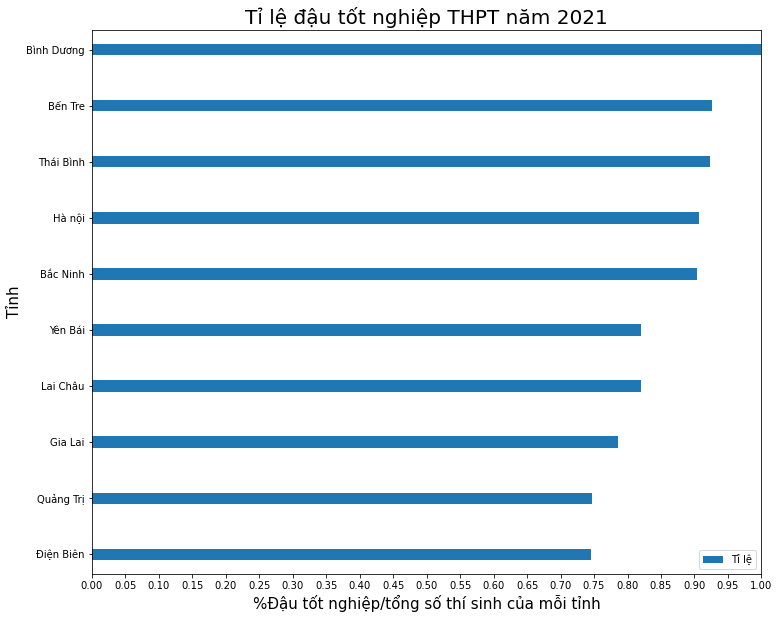

In [51]:
chart = []
for i in Tile_2021.keys(): 
    chart.append([i,Tile_2021[i]])
chart = pd.DataFrame(chart, columns= ['Tỉnh', 'Tỉ lệ'])
chart = chart.sort_values('Tỉ lệ', ascending=True)
chart = chart[chart['Tỉ lệ'] != 0]
chart_temp = chart.iloc[lambda x: x.index%6==0];
chart_temp = chart_temp.set_index("Tỉnh")
chart_temp.plot.barh(figsize = (12,10), width = 0.2)
plt.xticks(np.arange(0, 1.05, step = 0.05))
plt.title("Tỉ lệ đậu tốt nghiệp THPT năm 2021", fontsize = 20)
plt.xlim(0,1)
plt.ylabel('Tỉnh', fontsize = 15)
plt.xlabel('%Đậu tốt nghiệp/tổng số thí sinh của mỗi tỉnh', fontsize = 15);

#### Nhận xét:

+ Sự chênh lệch tỉ lệ tốt nghiệp giữa tỉnh có tỉ lệ cao nhất và thấp nhất rất lớn.
+ Tỉnh có tỉ lệ tốt nghiệp cao nhất cả nước là Bình Dương với tỉ lệ đậu tốt nghiệp xấp xỉ 99,94%.
+ Tỉnh có tỉ lệ tốt nghiệp thấp nhất cả nước là Hà Giang với tỉ lệ đậu tốt nghiệp là hơn 50.83%.
+ Có thể thấy các tỉnh có tỉ lệ tốt nghiệp thấp là những vùng có điều kiện cơ sở vật chất không tốt, những vùng sâu vùng xa và có thể là điều kiện kinh tế gia đình,...
+ Nhưng bên cạnh đó thì các tỉnh có điều kiện học tập tốt như Hà Nội, Đà Nẵng, Huế,... lại chưa có tỉ lệ đậu tốt nghiệp cao.

=> Những năm tới cần tập trung phát triển giáo dục đến những vùng khó khăn, phát triển chất lượng, số lượng giáo viên ở các vùng khó khăn. Còn ở các vùng đã có điều kiện thì cần phải cải thiện, tăng cường sự kiểm soát tới quá trình và trình độ học vấn của các thí sinh để có thể đưa ra biện pháp cái thiện phù hợp với từng hoàn cảnh.

## Câu hỏi 4: 
### Nội dung câu hỏi
So sánh phổ điểm của các khối thi
### Bao gồm các khối:
- Khối A: Toán, Vật lý, Hóa học
- Khối A1: Toán, Vật lý, Tiếng Anh
- Khối B: Toán, Hóa học, Sinh học
- Khối C: Ngữ văn, Lịch sử, Địa lý
- Khối D1: Ngữ văn, Toán, Tiếng Anh
- Khối D2: Ngữ văn, Toán, Tiếng Nga
- Khối D3: Ngữ văn, Toán, Tiếng Pháp
- Khối D4: Ngữ văn, Toán, Tiếng Trung Quốc
- Khối D5: Ngữ văn, Toán, Tiếng Đức 
- Khối D6: Ngữ văn, Toán, Tiếng Nhật

### Đầu tiên ta tính điểm thi theo từng khối của từng thí sinh.

In [52]:
df['A']= df['math']+df['physics']+df['chemistry']
df['A1']= df['math']+df['physics']+df['english']
df['B']= df['math']+df['biology']+df['chemistry']
df['C']= df['literature']+df['history']+df['geography']
df['D1']= df['literature']+df['math']+df['english']
df['D2']= df['literature']+df['math']+df['russian']
df['D3']= df['literature']+df['math']+df['french']
df['D4']= df['literature']+df['math']+df['chinese']
df['D5']= df['literature']+df['math']+df['german']
df['D6']= df['literature']+df['math']+df['japanese']

df_group = df[['A','A1','B','C','D1','D2','D3','D4','D5','D6']].copy()
df_group.head(5)

,A,A1,B,C,D1,D2,D3,D4,D5,D6
0,NaN,NaN,NaN,23.75,27.45,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,14.50,NaN,NaN,NaN,NaN,NaN,NaN
2,15.4,22.40,14.9,NaN,25.15,NaN,NaN,NaN,NaN,NaN
3,22.8,26.45,19.8,NaN,26.45,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,20.25,25.35,NaN,NaN,NaN,NaN,NaN


### Tiếp theo ta cho hiển thị các số liệu thống kê về điểm của các khối để có nhìn bao quát 

In [53]:
df_group.describe()

,A,A1,B,C,D1,D2,D3,D4,D5,D6
count,331686.000000,320114.000000,329502.000000,613849.000000,835701.000000,103.000000,791.000000,2152.000000,107.000000,1006.000000
mean,21.041619,21.105937,19.993407,18.337480,19.274288,24.210194,22.916384,22.120395,22.677103,21.376352
std,3.188018,3.442263,3.086493,3.617743,4.108795,2.376389,3.276528,4.082515,3.045359,3.600366
min,4.050000,4.850000,4.400000,0.750000,4.250000,17.350000,9.650000,6.600000,13.200000,11.400000
25%,19.150000,18.800000,18.000000,16.000000,16.350000,22.975000,20.900000,20.100000,21.200000,18.550000
50%,21.450000,21.400000,20.200000,18.250000,19.400000,24.750000,23.550000,23.200000,23.100000,21.925000
75%,23.400000,23.750000,22.100000,20.750000,22.550000,25.775000,25.550000,25.100000,24.850000,24.450000
max,29.550000,29.550000,30.000000,29.250000,29.150000,27.700000,28.300000,28.300000,27.850000,27.850000


### Tiếp đến tạo 1 dataframe mới dựa trên data về điểm của các khối bằng cách nhóm theo số lượng thí sinh và điểm được chia từ 0 - 30 (khoảng cách là 1)

In [54]:
a = np.arange(0,31,1,dtype = int)
temp = pd.DataFrame()
temp['A'] = df_group['A'].value_counts(bins = a, sort = False)
temp['A1'] = df_group['A1'].value_counts(bins = a, sort = False)
temp['B'] = df_group['B'].value_counts(bins = a, sort = False)
temp['C'] = df_group['C'].value_counts(bins = a, sort = False)
temp['D1'] = df_group['D1'].value_counts(bins = a, sort = False)
temp['D2'] = df_group['D2'].value_counts(bins = a, sort = False)
temp['D3'] = df_group['D3'].value_counts(bins = a, sort = False)
temp['D4'] = df_group['D4'].value_counts(bins = a, sort = False)
temp['D5'] = df_group['D5'].value_counts(bins = a, sort = False)
temp['D6'] = df_group['D6'].value_counts(bins = a, sort = False)

### Vẽ biểu đồ đường để dễ dàng so sánh giữa các khối thi với nhau

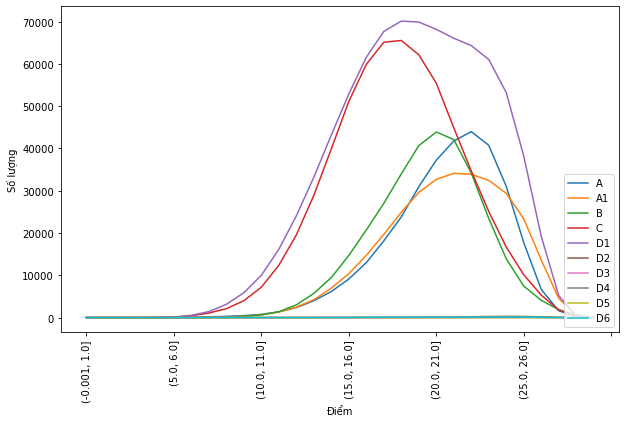

In [55]:
temp.plot(figsize=(10, 6))
plt.xlabel("Điểm")
plt.xticks(rotation = 90) 
plt.ylabel("Số lượng")
plt.legend(loc='lower right')
plt.show()

### Nhận xét:
Qua biểu đồ có thể thấy Khối C, D được thi nhiều nhất và các khối A, A1, B có phổ điểm trung bình cao nhất 

Giải thích:
    
- Do xu hướng hiện nay các trường đại học chuyển qua xét tuyển học bạ và thi đánh giá năng lực để có thể tuyển sinh sớm nên các khối xã hội được chọn để hoàn thành tốt nghiệp khá nhiều
- Trong khi đó các khối A,A1,B là các khối tự nhiên có tỉ lệ cạnh tranh cao khi xét điểm vào đại học nên có phổ điểm trung bình cao
